## CUSTOMER CHURN ANALYSIS
Customer churn analysis is a vital process for businesses seeking to understand and manage customer attrition. Churn, also known as customer turnover, refers to the rate at which customers cease doing business with a company,so will be analyzing to know why customer churn.

### importing libraries

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as  ce
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest, f_classif




from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score





import warnings

warnings.filterwarnings('ignore')




# DATA PREPROCESSING

### READING THE DATASET


In [2]:
customer = pd.read_csv('customer_data.csv')

In [3]:
churn = pd.read_csv('churn_data.csv')

In [4]:
historical = pd.read_csv('historical_price_data.csv')

# DATA CLEANING

In [5]:
historical.head(3) # TO CHECK THE FIRST 3 ROW OF THE TABLE

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [6]:
customer.head(5) # TO CHECK THE FIRST 5 ROW OF THE TABLE

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [7]:
churn.head(3) # TO CHECK THE FIRST 3 ROW OF THE TABLE

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0


###  MERGING TABLES

In [8]:
# merging churn and customer's table
cust_churn = pd.merge(customer , churn, on = 'id',how = 'outer')

In [9]:
cust_churn.head(5) # TO CHECK THE FIRST 5 ROW OF THE MERGED TABLE

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [10]:
historical.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


### We have to pivot the table because we observed it has duplicated id

In [11]:
# to change the datatype to datetime
historical['price_date'] = pd.to_datetime(historical['price_date'])


In [12]:
# extracting the year from price_date column
historical['year'] = historical['price_date'].dt.year


In [13]:
#pivot historical_price_data
historical=historical.pivot_table(index='id',columns='year',values=['price_p1_var','price_p2_var',
                                                                          'price_p3_var','price_p1_fix','price_p2_fix',
                                                                          'price_p3_fix'],aggfunc='mean')


In [14]:
historical = pd.DataFrame(historical)
historical.columns = historical.columns.droplevel(1)
historical

,price_p1_fix,price_p1_var,price_p2_fix,price_p2_var,price_p3_fix,price_p3_var
id,,,,,,
0002203ffbb812588b632b9e628cc38d,40.701732,0.124338,24.421038,0.103794,16.280694,0.073160
0004351ebdd665e6ee664792efc4fd13,44.385450,0.146426,0.000000,0.000000,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,45.319710,0.181558,0.000000,0.000000,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,40.647427,0.118757,24.388455,0.098292,16.258971,0.069032
00114d74e963e47177db89bc70108537,44.266930,0.147926,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,40.896427,0.138863,24.637456,0.115125,16.507972,0.080780
fffac626da707b1b5ab11e8431a4d0a2,44.311375,0.147137,0.000000,0.000000,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,41.160171,0.153879,24.895768,0.129497,16.763569,0.094842


In [15]:
# merging the merged table to historical table
electricity_table = pd.merge(cust_churn,historical, on = 'id' ,how = 'outer')

In [16]:
electricity_table.head(5) # checking the final mrged table

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,num_years_antig,origin_up,pow_max,churn,price_p1_fix,price_p1_var,price_p2_fix,price_p2_var,price_p3_fix,price_p3_var
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,58.956502,0.103449,36.356887,0.092115,8.337051,0.067241
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,40.640023,0.122856,24.384011,0.102137,16.256008,0.072579
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,44.315416,0.149934,0.000000,0.000000,0.000000,0.000000
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,44.385450,0.170512,0.000000,0.088421,0.000000,0.000000
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,44.400265,0.151210,0.000000,0.000000,0.000000,0.000000


# EXPLORATORY DATA ANALYSIS

In [17]:
electricity_table.shape # to check the number of columns and rows

(16096, 39)

In [18]:
electricity_table.columns # to check the columns in the table

Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_p1_fix', 'price_p1_var', 'price_p2_fix', 'price_p2_var',
       'price_p3_fix', 'price_p3_var'],
      dtype='object')

In [19]:
electricity_table.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [20]:
electricity_table.describe() #to check the statitical summary of the dataset

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,net_margin,num_years_antig,pow_max,churn,price_p1_fix,price_p1_var,price_p2_fix,price_p2_var,price_p3_fix,price_p3_var
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,16081.000000,16096.000000,16093.000000,16096.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,217.987028,5.030629,20.604131,0.099093,43.327752,0.141004,10.691430,0.054379,6.451230,0.030695
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,366.742030,1.676101,21.772421,0.298796,5.362695,0.024297,12.825881,0.049860,7.761357,0.036220
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,51.970000,4.000000,12.500000,0.000000,40.675988,0.123974,0.000000,0.000000,0.000000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,119.680000,5.000000,13.856000,0.000000,44.281745,0.147251,0.000000,0.085945,0.000000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,275.810000,6.000000,19.800000,0.000000,44.370635,0.150316,24.388455,0.102396,16.248110,0.072778
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,24570.650000,16.000000,500.000000,1.000000,59.444710,0.278759,36.490692,0.196275,16.818917,0.102951


#### 75% OF CUSTOMERS HAVE NUM_YEAR_ANTIG LESS THAT 6 YEARS
THE AVERAGE CONSUMPTION OF ELECTRICITY IN 12 MONTH IS (1.948044e+05) 194,804.4

In [21]:
electricity_table.dtypes # checking the datatype

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [22]:
electricity_table.isnull().sum() # checking the null value in the dataset

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

<Axes: >

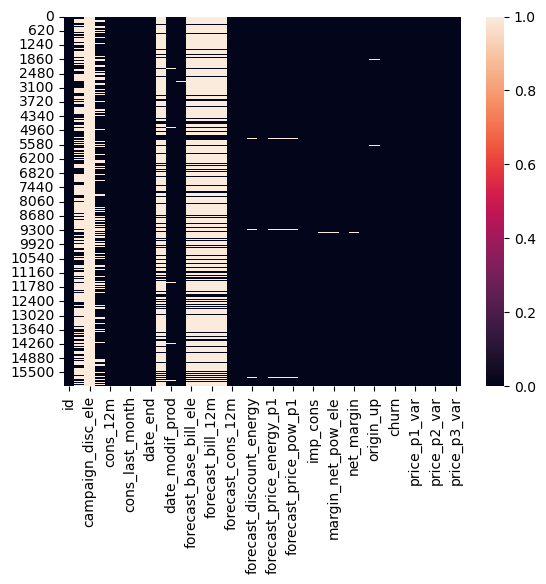

In [23]:
#to check for missing value with heatmap
sns.heatmap(electricity_table.isnull())

In [24]:
# Check the percentage of missing values in each column
missing_data1 = electricity_table.isnull().mean() * 100
print(missing_data1)

id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele     

In [25]:
electricity_table[electricity_table.duplicated()] # checking for duplicate in the data

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,num_years_antig,origin_up,pow_max,churn,price_p1_fix,price_p1_var,price_p2_fix,price_p2_var,price_p3_fix,price_p3_var


In [26]:
# Identify categorical columns
categorical_cols = electricity_table.select_dtypes(include=['category', 'object'])
categorical_cols

,id,activity_new,channel_sales,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,has_gas,origin_up
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,f,ldkssxwpmemidmecebumciepifcamkci
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,t,lxidpiddsbxsbosboudacockeimpuepw
16092,d0a6f71671571ed83b2645d23af6de00,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,f,lxidpiddsbxsbosboudacockeimpuepw
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,f,lxidpiddsbxsbosboudacockeimpuepw
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,f,lxidpiddsbxsbosboudacockeimpuepw


# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

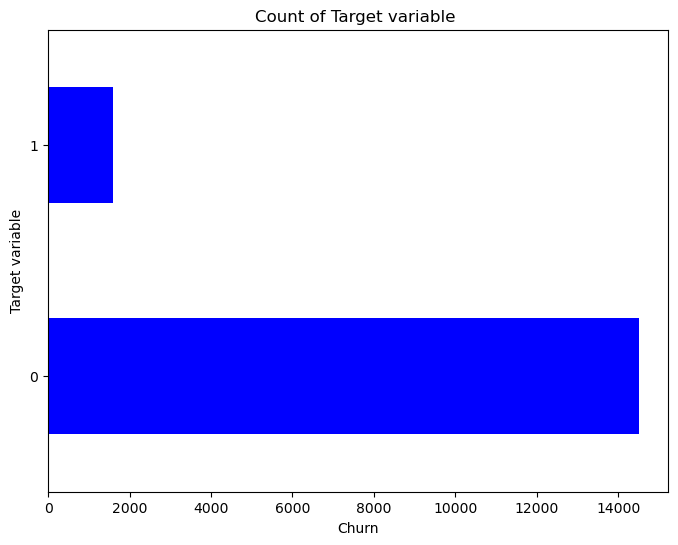

In [27]:
# Calculate the distribution of churn
churn_distribution = electricity_table['churn'].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart of the churn distribution
churn_distribution.plot(kind='barh', ax=ax, color='blue')

# Set labels and title
ax.set_xlabel('Churn')
ax.set_ylabel('Target variable')
ax.set_title('Count of Target variable ')

# Show the plot
plt.show()


In [28]:
100* electricity_table['churn'].value_counts()/len( electricity_table['churn']) # percentage of churn rate

churn
0    90.090706
1     9.909294
Name: count, dtype: float64

### THE DATA IS HIGHLY IMBALANCED WITH A RATIO OF 90 : 10

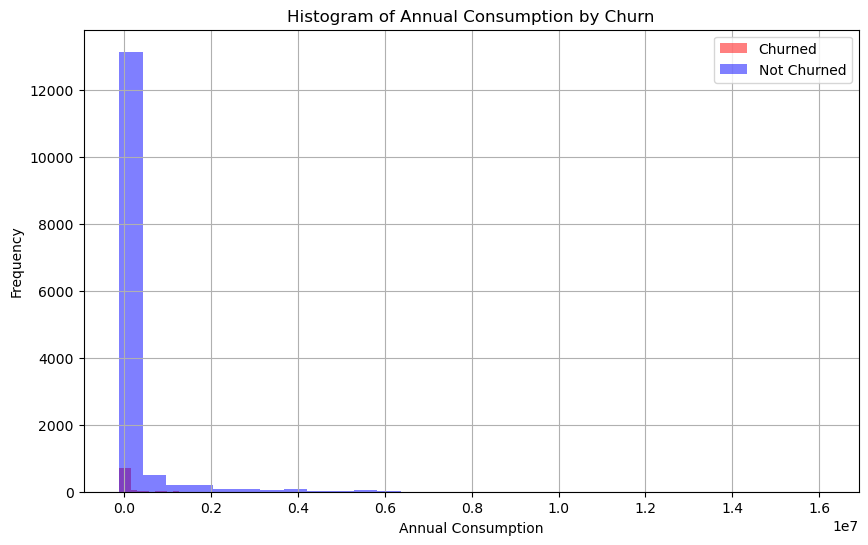

In [29]:
# Example: Histogram of annual consumption for churned vs non-churned customers
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['cons_12m'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['cons_12m'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('Annual Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Consumption by Churn')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

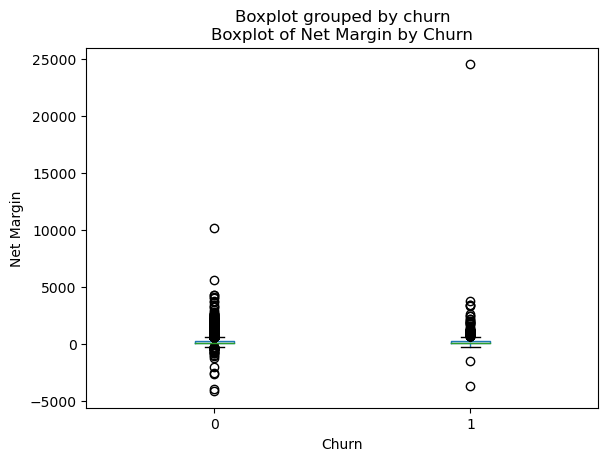

In [30]:
# Example: Boxplot of net margin by churn status
plt.figure(figsize=(8, 6))
electricity_table.boxplot(column='net_margin', by='churn', grid=False)
plt.title('Boxplot of Net Margin by Churn')
plt.xlabel('Churn')
plt.ylabel('Net Margin')
plt.show()

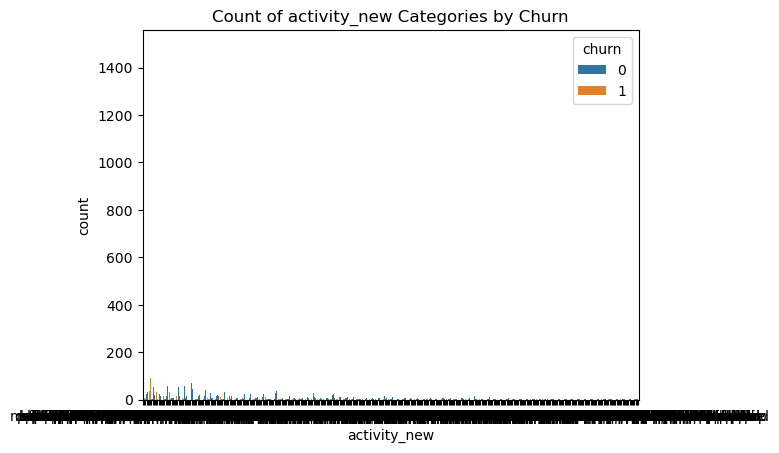

In [31]:
#  Visualize the distribution of a categorical feature (e.g., feature2) using count plots
sns.countplot(data=electricity_table, x='activity_new', hue='churn')
plt.title('Count of activity_new Categories by Churn')
plt.show()


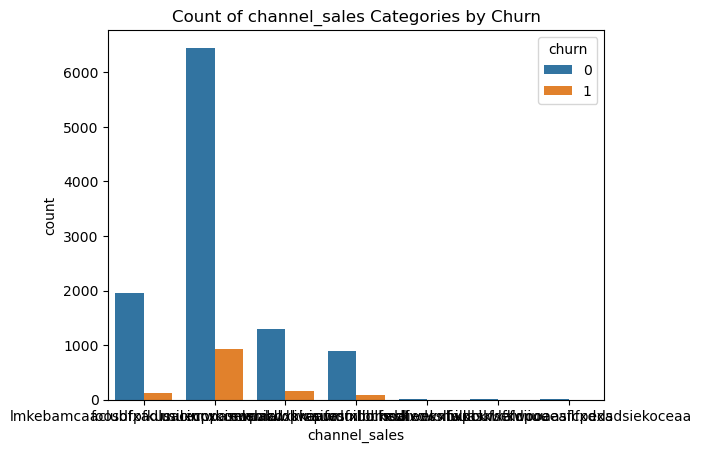

In [32]:
#  Visualizing the distribution of a channel_sales using count plots
sns.countplot(data=electricity_table, x='channel_sales', hue='churn')
plt.title('Count of channel_sales Categories by Churn')
plt.xticks(rotation=45)
plt.show()

### Customer acquired through channel 2 are at higher risk of churning.
This suggest that there may be issues with the customer acquisition process  or the overall customer experience specific to the channels that needs to be addressed

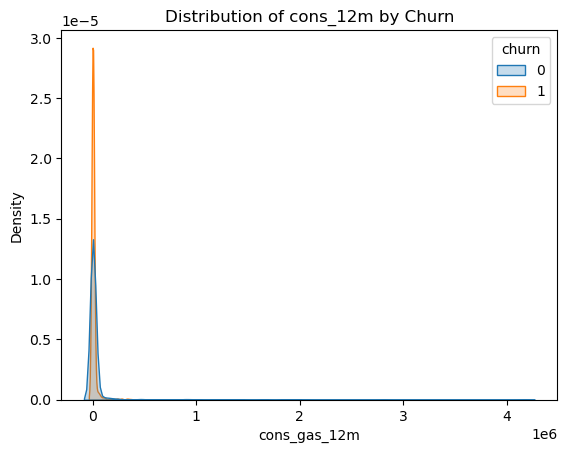

In [33]:
sns.kdeplot(
    data=electricity_table,
    x='cons_gas_12m',
    hue='churn',
    fill=True, 
    common_norm=False,  
)

# title of the plot
plt.title('Distribution of cons_12m by Churn')

# Show the plot
plt.show()


### Customer who have consumed 0 gas in the past 12 months are at a higher risk of churning. 
This suggest that customer who are not using gas services are most likely to cancel their subscription or switch to a different provider.



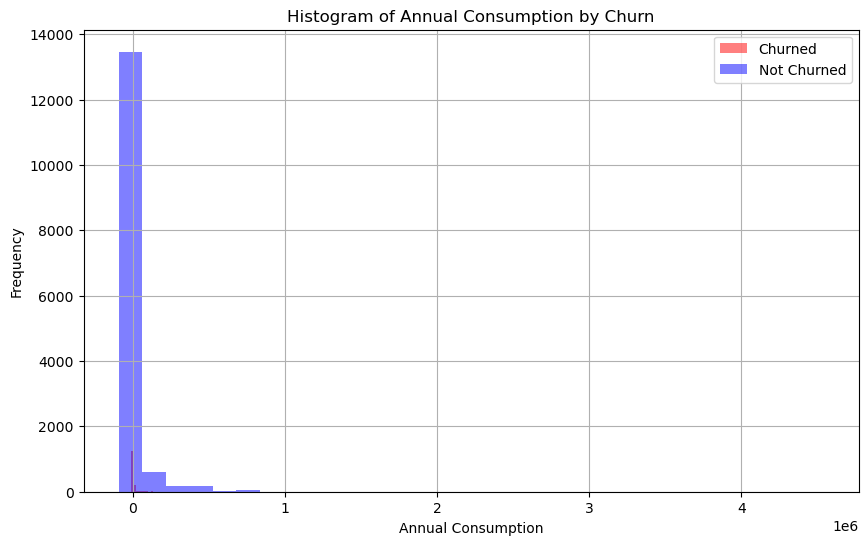

In [34]:
# Data visualization
# Example: Histogram of annual consumption for churned vs non-churned customers
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['cons_last_month'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['cons_last_month'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('Annual Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Consumption by Churn')
plt.legend()
plt.show()

#### this columun has minimal impact on those that churned

In [35]:
# Convert join_date to datetime format
electricity_table['date_activ'] = pd.to_datetime(electricity_table['date_activ'])
electricity_table['date_end'] = pd.to_datetime(electricity_table['date_end'])
electricity_table['date_first_activ'] = pd.to_datetime(electricity_table['date_first_activ'])
electricity_table['date_modif_prod'] = pd.to_datetime(electricity_table['date_modif_prod'])
electricity_table['date_renewal'] = pd.to_datetime(electricity_table['date_renewal'])

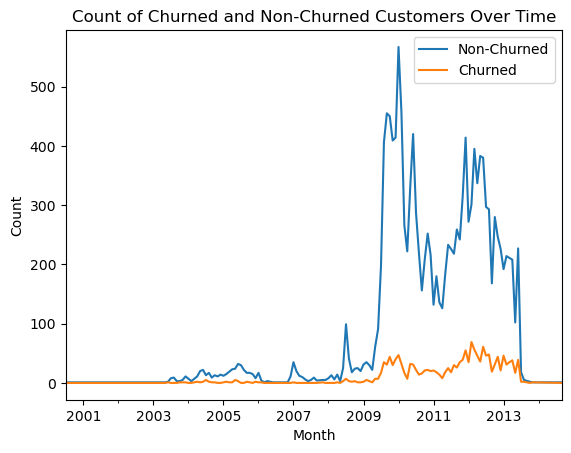

In [36]:
# Group by month and calculate the count of churned and non-churned customers
time_series = electricity_table.groupby(electricity_table['date_activ'].dt.to_period('M'))['churn'].value_counts().unstack().fillna(0)

# Plot the time series
time_series.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Churned and Non-Churned Customers Over Time')
plt.legend(['Non-Churned', 'Churned'])
plt.show()

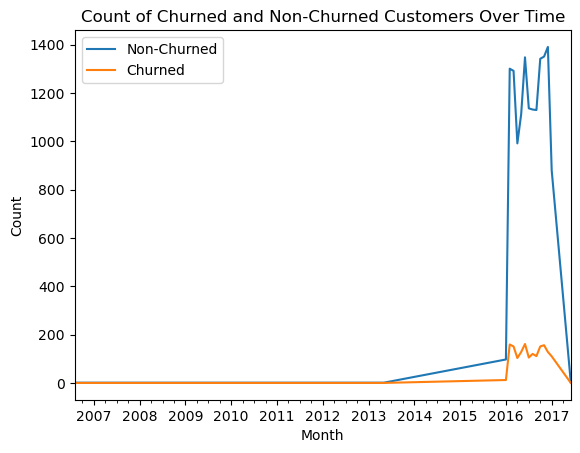

In [37]:
# Group by month and calculate the count of churned and non-churned customers
time_series = electricity_table.groupby(electricity_table['date_end'].dt.to_period('M'))['churn'].value_counts().unstack().fillna(0)

# Plot the time series
time_series.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Churned and Non-Churned Customers Over Time')
plt.legend(['Non-Churned', 'Churned'])
plt.show()

#### they started churning in 2016 with a count around 200

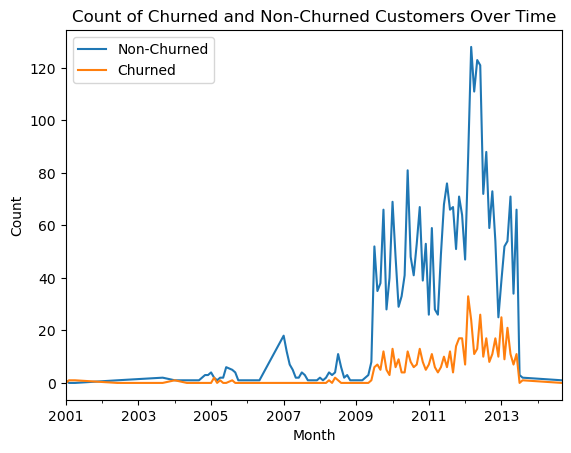

In [38]:
# Group by month and calculate the count of churned and non-churned customers
time_series = electricity_table.groupby(electricity_table['date_first_activ'].dt.to_period('M'))['churn'].value_counts().unstack().fillna(0)

# Plot the time series
time_series.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Churned and Non-Churned Customers Over Time')
plt.legend(['Non-Churned', 'Churned'])
plt.show()

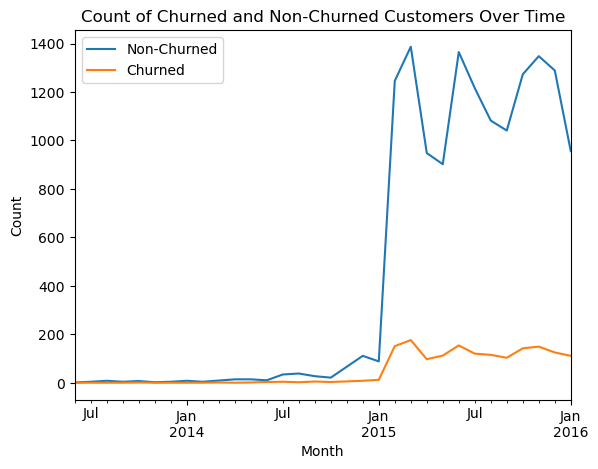

In [39]:
# Group by month and calculate the count of churned and non-churned customers
time_series = electricity_table.groupby(electricity_table['date_renewal'].dt.to_period('M'))['churn'].value_counts().unstack().fillna(0)

# Plot the time series
time_series.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Churned and Non-Churned Customers Over Time')
plt.legend(['Non-Churned', 'Churned'])
plt.show()

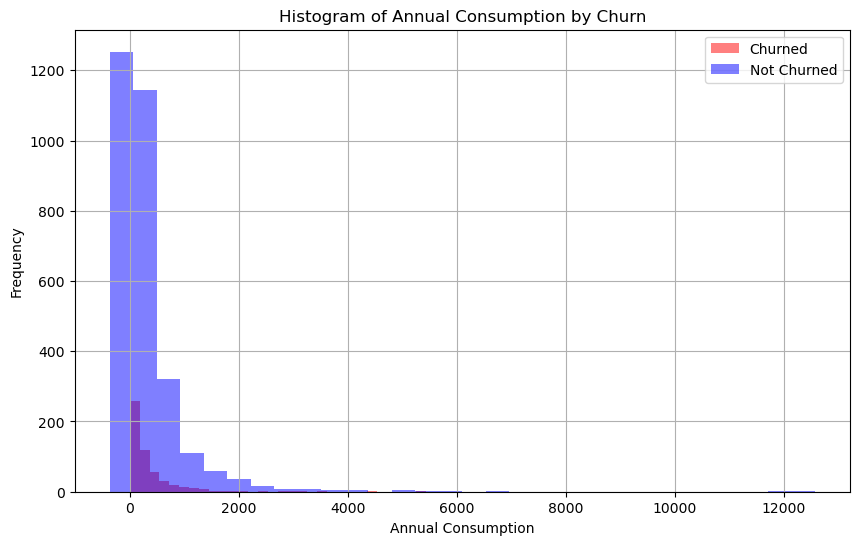

In [40]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['forecast_base_bill_ele'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['forecast_base_bill_ele'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('Annual Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Consumption by Churn')
plt.legend()
plt.show()


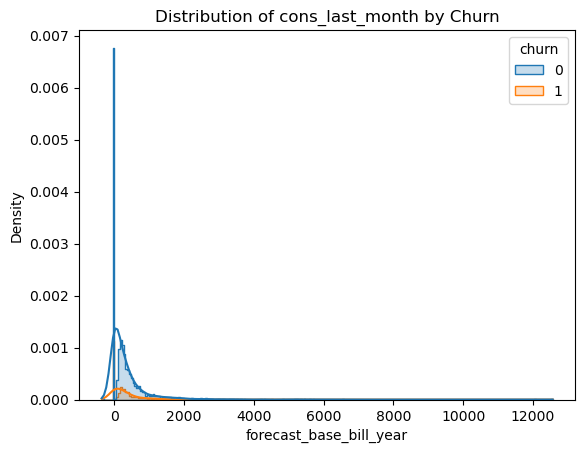

In [41]:
# 1. Visualize the distribution of a numeric feature (e.g., feature1) using histograms
sns.histplot(data=electricity_table, x='forecast_base_bill_year', hue='churn', kde=True, element='step', stat='density')
plt.title('Distribution of cons_last_month by Churn')
plt.show()

### 2.	Customer with forecasted bill for electricity for the year  with value 0_2000 at high risk of Churning.

This suggest that customers who are not consuming electricity sufficiently (margin next power) and do not have a significant financial commitment (forecasted bill) are more likely to switch to a different provider.


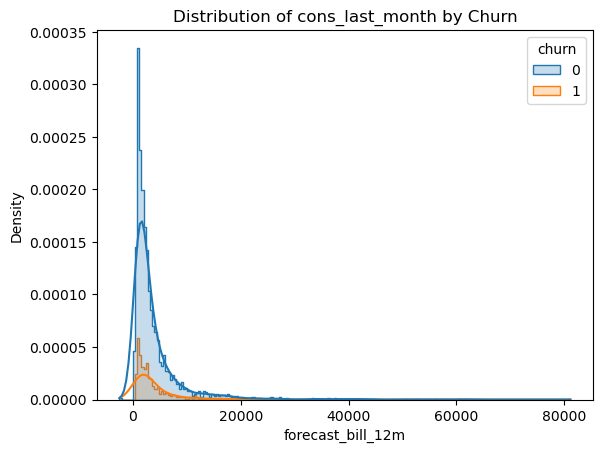

In [42]:
# 1. Visualize the distribution of a numeric feature (e.g., feature1) using histograms
sns.histplot(data=electricity_table, x='forecast_bill_12m', hue='churn', kde=True, element='step', stat='density')
plt.title('Distribution of cons_last_month by Churn')
plt.show()

### 2.	Customer with forecasted bill for electricity for the next 12 months with value 0_2000 at high risk of Churning.
This suggest that customers who are not consuming electricity (margin next power) and do not have a significant financial commitment (forecasted bill) are more likely to switch to a different provider.


In [43]:
electricity_table[electricity_table['forecast_bill_12m'] < 2500]

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,num_years_antig,origin_up,pow_max,churn,price_p1_fix,price_p1_var,price_p2_fix,price_p2_var,price_p3_fix,price_p3_var
7,1aa498825382410b098937d65c4ec26d,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2011-12-09,...,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1,44.266930,0.168953,0.000000,0.087632,0.000000,0.000000
29,389bbbe70248fbeecdf9bb1bd0d1da04,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,2010-11-17,2016-11-17,2010-11-17,...,5,lxidpiddsbxsbosboudacockeimpuepw,23.100,1,40.621214,0.124068,24.389392,0.103734,16.273483,0.073529
48,f8943edfeb1783f3793d3abc6305c1e3,sfisfxfcocfpcmckuekokxuseixdaoeu,NaN,usilxuppasemubllopkaafesmlibmsdf,13859,0,0,2011-03-15,2016-03-15,2011-03-15,...,5,lxidpiddsbxsbosboudacockeimpuepw,13.200,0,44.400265,0.151210,0.000000,0.000000,0.000000,0.000000
52,cdcc2c363d5b34232082cee78776e59e,NaN,NaN,NaN,5162,0,0,2010-11-18,2016-11-18,2010-11-18,...,5,lxidpiddsbxsbosboudacockeimpuepw,13.860,0,0.000000,0.000600,0.000000,0.000000,0.000000,0.000000
71,d44fcb35df8f88e9032ad52678d060a3,apdekpcbwosbxepsfxclislboipuxpop,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1017579,187578,120936,2011-06-14,2016-06-14,2011-06-14,...,5,lxidpiddsbxsbosboudacockeimpuepw,29.700,0,40.647427,0.122756,24.388455,0.102290,16.258971,0.073030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16037,f02b604cc63f761bf34e136d976f1637,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3162,0,512,2009-11-19,2016-11-19,2009-11-19,...,6,lxidpiddsbxsbosboudacockeimpuepw,19.800,0,40.621214,0.124068,24.389392,0.103734,16.273483,0.073529
16046,4b8902f3ff0b41cc125d510bad0edbb3,NaN,NaN,NaN,8114,46754,0,2009-10-08,2016-10-08,2009-10-08,...,6,lxidpiddsbxsbosboudacockeimpuepw,13.856,0,44.296560,0.149712,0.000000,0.000000,0.000000,0.000000
16064,6f3763461e481197bb3c669deb1a88b5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2919,0,0,2010-12-14,2016-12-14,2010-12-14,...,5,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,44.266930,0.149577,0.000000,0.000000,0.000000,0.000000
16082,c525fcb0860e5705d37743f5b5cadbfe,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3909,0,155,2012-10-23,2016-11-12,2012-10-23,...,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,1,44.341005,0.146767,0.000000,0.000000,0.000000,0.000000


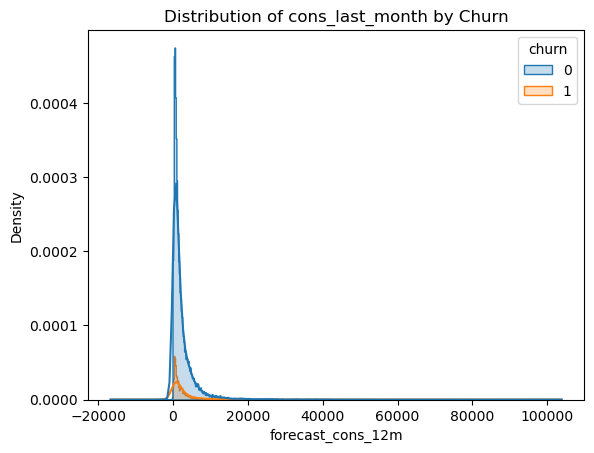

In [44]:
sns.histplot(data=electricity_table, x='forecast_cons_12m', hue='churn', kde=True, element='step', stat='density')
plt.title('Distribution of cons_last_month by Churn')
plt.show()

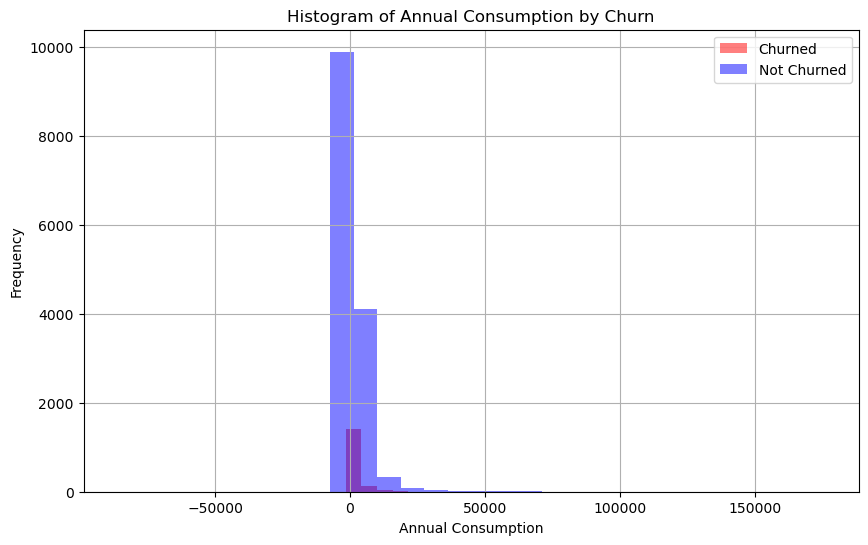

In [45]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['forecast_cons_year'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['forecast_cons_year'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('Annual Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Consumption by Churn')
plt.legend()
plt.show()


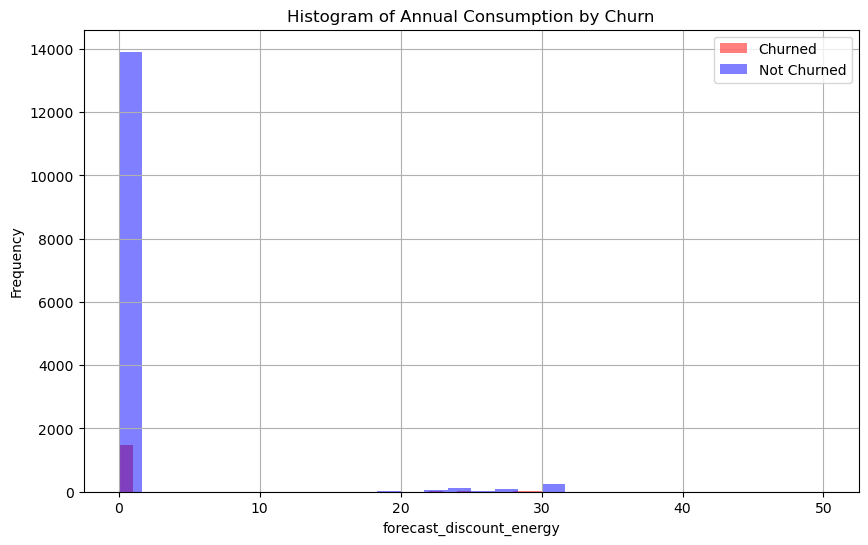

In [46]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['forecast_discount_energy'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['forecast_discount_energy'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('forecast_discount_energy')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Consumption by Churn')
plt.legend()
plt.show()

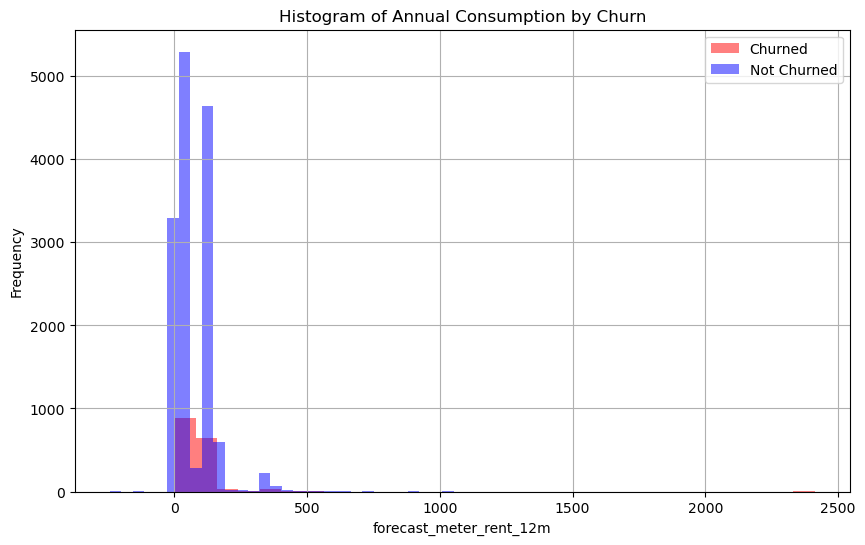

In [47]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['forecast_meter_rent_12m'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['forecast_meter_rent_12m'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('forecast_meter_rent_12m')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Consumption by Churn')
plt.legend()
plt.show()


In [48]:
column_name = 'forecast_meter_rent_12m'
filtered_values = electricity_table[(electricity_table[column_name] >= 0) & (electricity_table[column_name] <= 200)][column_name].values
print(filtered_values)

[  1.78  16.27  38.72 ... 129.6    7.18   1.07]


### Customer with forecasted meter rent of 0 to 300 naira for the next 12 months are more likely to churn.
This suggest that customers who were expected to have low or no meter rent costs were more likely to churn

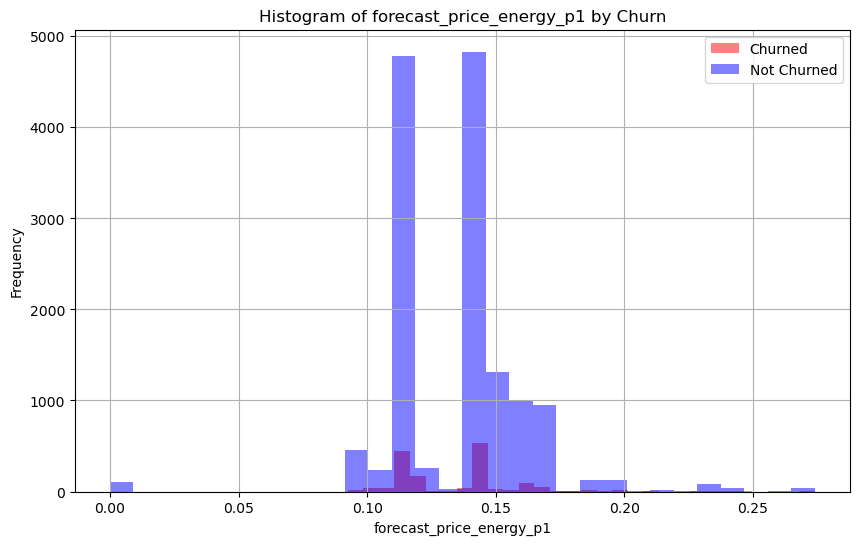

In [49]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['forecast_price_energy_p1'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['forecast_price_energy_p1'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('forecast_price_energy_p1')
plt.ylabel('Frequency')
plt.title('Histogram of forecast_price_energy_p1 by Churn')
plt.legend()
plt.show()


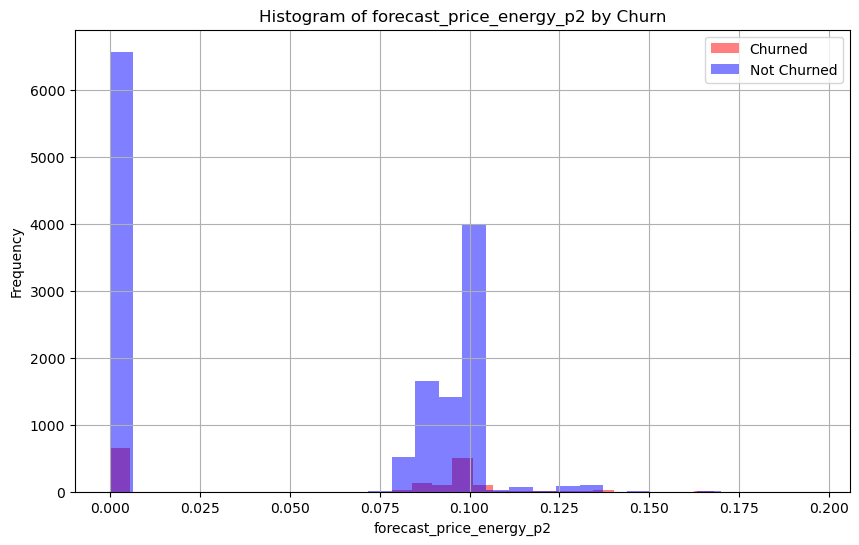

In [50]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['forecast_price_energy_p2'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['forecast_price_energy_p2'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('forecast_price_energy_p2')
plt.ylabel('Frequency')
plt.title('Histogram of forecast_price_energy_p2 by Churn')
plt.legend()
plt.show()

### Customer who were forecasted to have low price of energy in period 2 were more likely to churn. This suggest that customers who anticipate low energy cost may not feel incentivized to stay with the company.



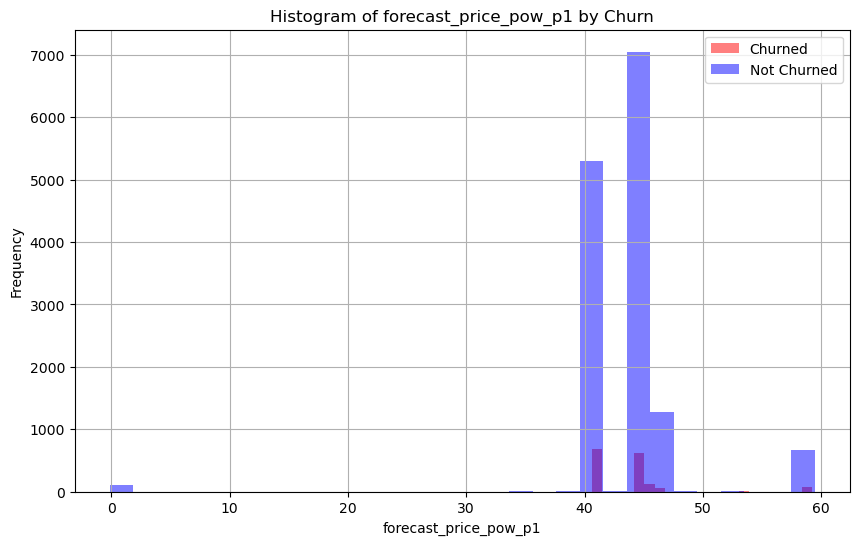

In [51]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['forecast_price_pow_p1'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['forecast_price_pow_p1'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('forecast_price_pow_p1')
plt.ylabel('Frequency')
plt.title('Histogram of forecast_price_pow_p1 by Churn')
plt.legend()
plt.show()

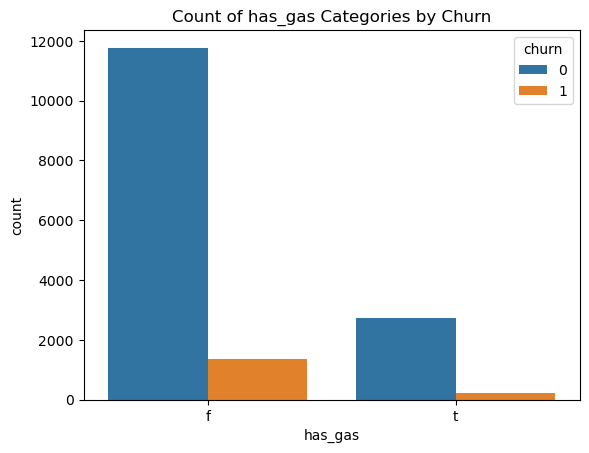

In [52]:
sns.countplot(data=electricity_table, x='has_gas', hue='churn')
plt.title('Count of has_gas Categories by Churn')
plt.show()

## Customer who have gas = false at higher risk of churning
This suggest that the absence of gas services may be a contributing factor to customer dissatisfaction and likelihood to churn.


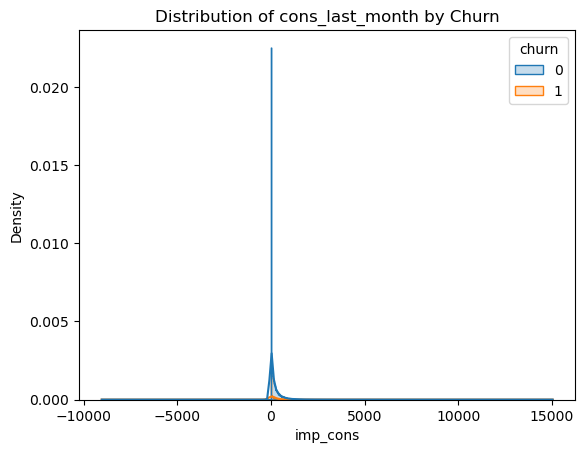

In [53]:
sns.histplot(data=electricity_table, x='imp_cons', hue='churn', kde=True, element='step', stat='density')
plt.title('Distribution of cons_last_month by Churn')
plt.show()

###### Customer with important consumption matrix (e.g. energy usage,data consumption) = 0 are more likely to churn.
This suggest that customers are not actively using the services or consuming the product are at the higher risk of churning.

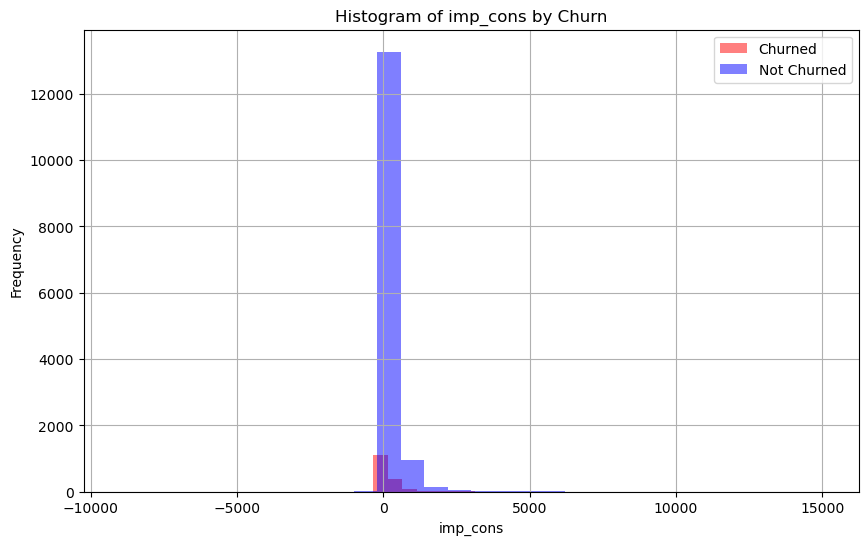

In [54]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['imp_cons'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['imp_cons'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('imp_cons')
plt.ylabel('Frequency')
plt.title('Histogram of imp_cons by Churn')
plt.legend()
plt.show()

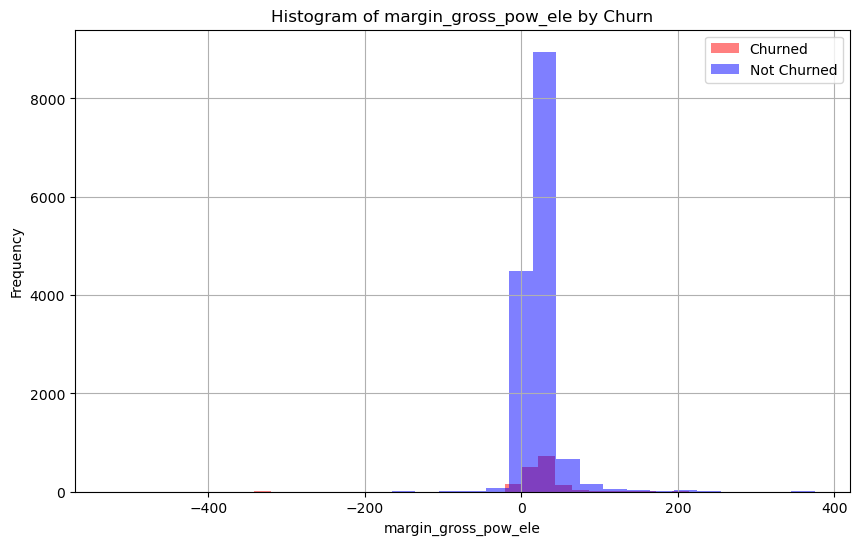

In [55]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['margin_gross_pow_ele'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['margin_gross_pow_ele'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('margin_gross_pow_ele')
plt.ylabel('Frequency')
plt.title('Histogram of margin_gross_pow_ele by Churn')
plt.legend()
plt.show()

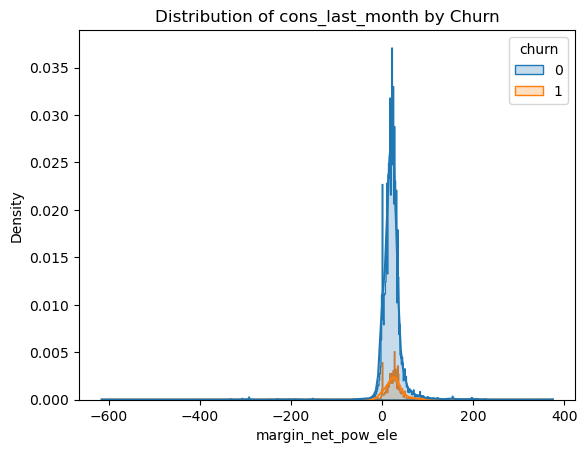

In [56]:
sns.histplot(data=electricity_table, x='margin_net_pow_ele', hue='churn', kde=True, element='step', stat='density')
plt.title('Distribution of cons_last_month by Churn')
plt.show()

### 1.	Customer with margin net power for electricity 0 are at high risk of churning 



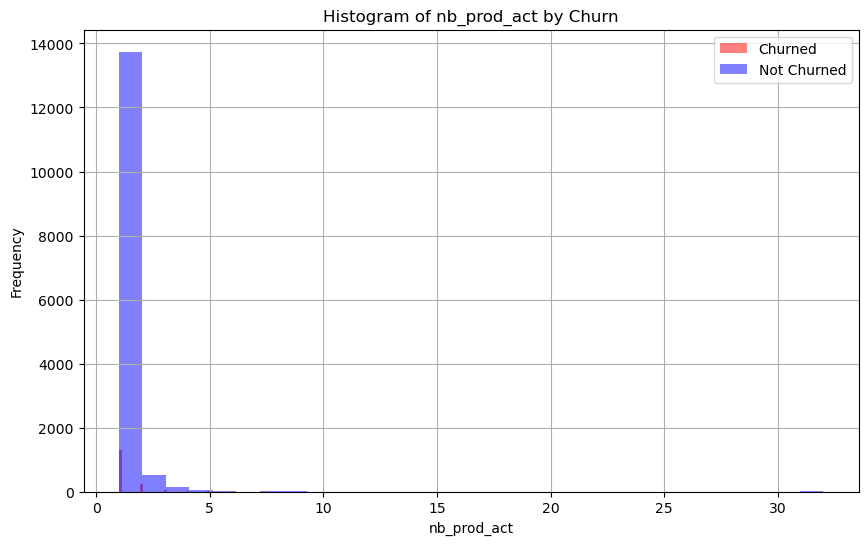

In [57]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['nb_prod_act'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['nb_prod_act'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('nb_prod_act')
plt.ylabel('Frequency')
plt.title('Histogram of nb_prod_act by Churn')
plt.legend()
plt.show()

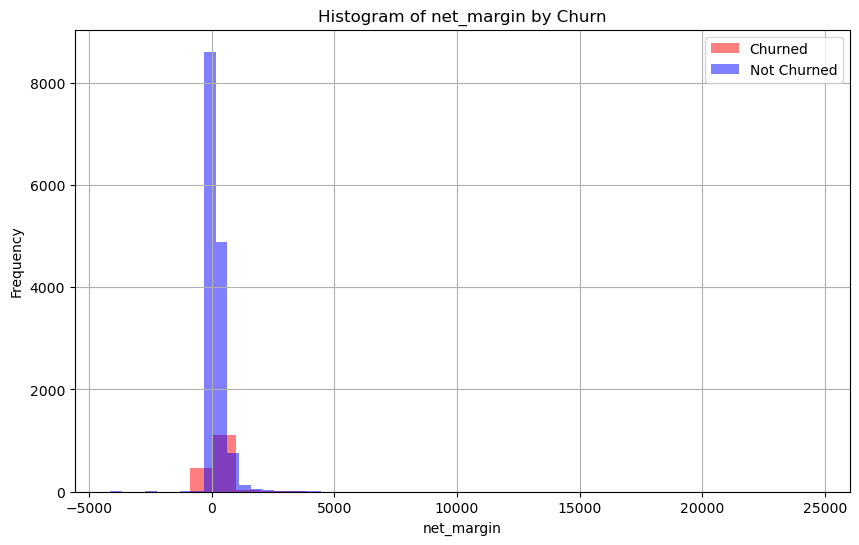

In [58]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['net_margin'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['net_margin'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('net_margin')
plt.ylabel('Frequency')
plt.title('Histogram of net_margin by Churn')
plt.legend()
plt.show()

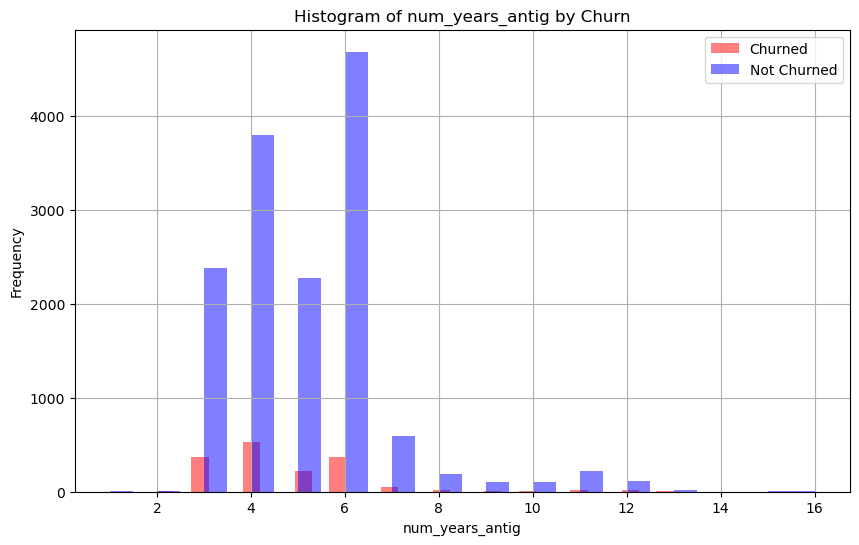

In [59]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['num_years_antig'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['num_years_antig'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('num_years_antig')
plt.ylabel('Frequency')
plt.title('Histogram of num_years_antig by Churn')
plt.legend()
plt.show()

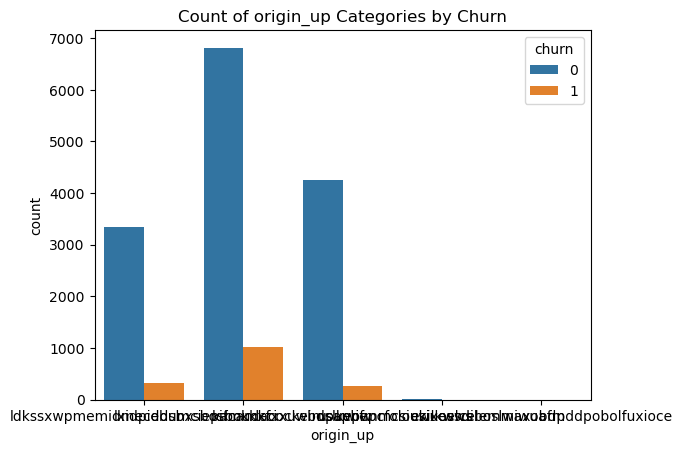

In [60]:
sns.countplot(data=electricity_table, x='origin_up', hue='churn')
plt.title('Count of origin_up Categories by Churn')
plt.xticks(rotation=45)
plt.show()

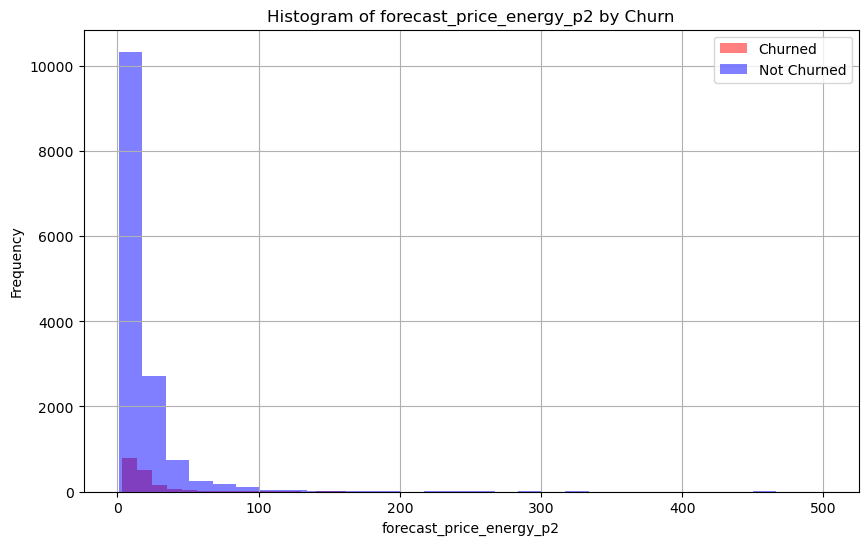

In [61]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['pow_max'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['pow_max'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('forecast_price_energy_p2')
plt.ylabel('Frequency')
plt.title('Histogram of forecast_price_energy_p2 by Churn')
plt.legend()
plt.show()

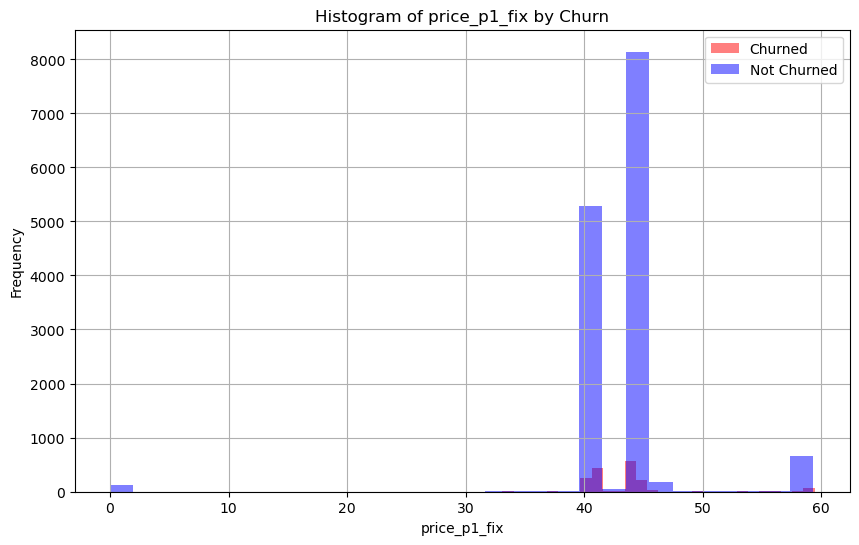

In [62]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['price_p1_fix'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['price_p1_fix'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('price_p1_fix')
plt.ylabel('Frequency')
plt.title('Histogram of price_p1_fix by Churn')
plt.legend()
plt.show()

In [66]:
electricity_table['price_p1_fix'].values

array([58.95650151, 40.64002325, 44.31541574, ..., 40.7017324 ,
       44.31541585, 44.26693046])

#### Customers who were charged a variable price for period 1, with value ranging from 44,000 to 58,000 churned.
This suggest that customers who expeerience a significant price variation in their energy costs were likely to churn

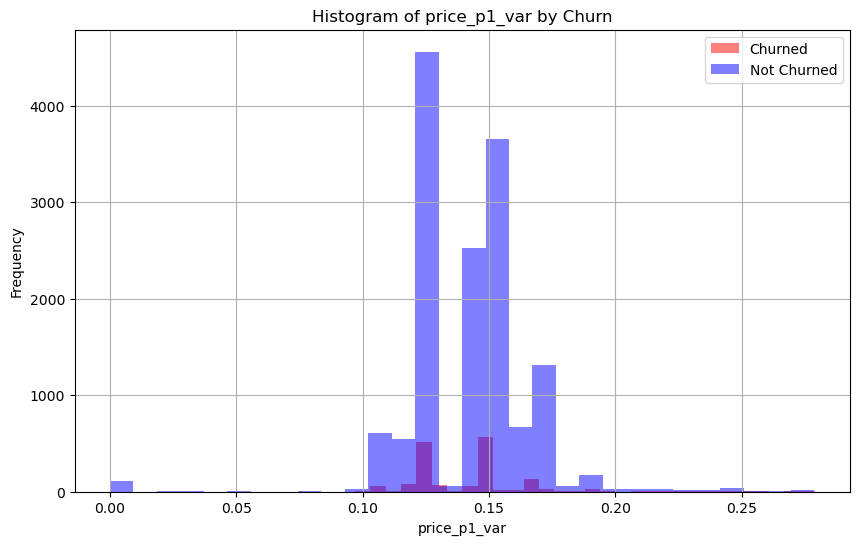

In [63]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['price_p1_var'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['price_p1_var'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('price_p1_var')
plt.ylabel('Frequency')
plt.title('Histogram of price_p1_var by Churn')
plt.legend()
plt.show()

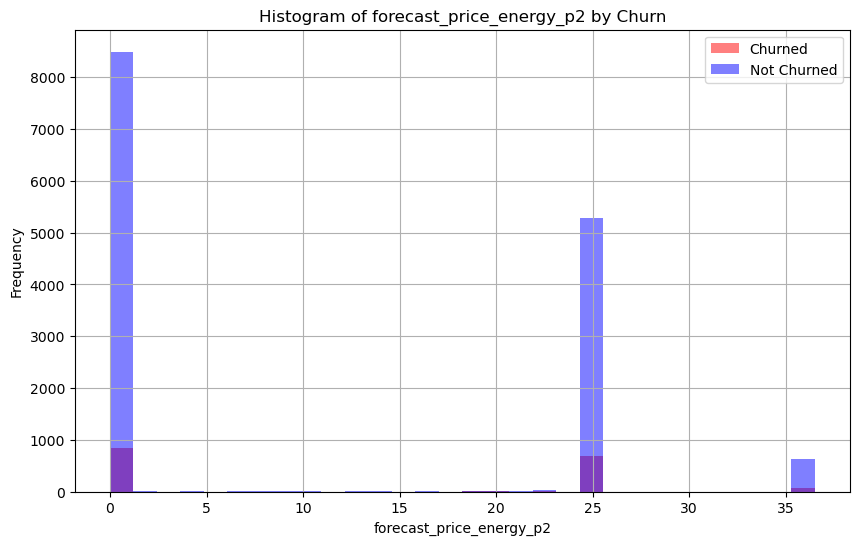

In [64]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['price_p2_fix'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['price_p2_fix'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('forecast_price_energy_p2')
plt.ylabel('Frequency')
plt.title('Histogram of forecast_price_energy_p2 by Churn')
plt.legend()
plt.show()

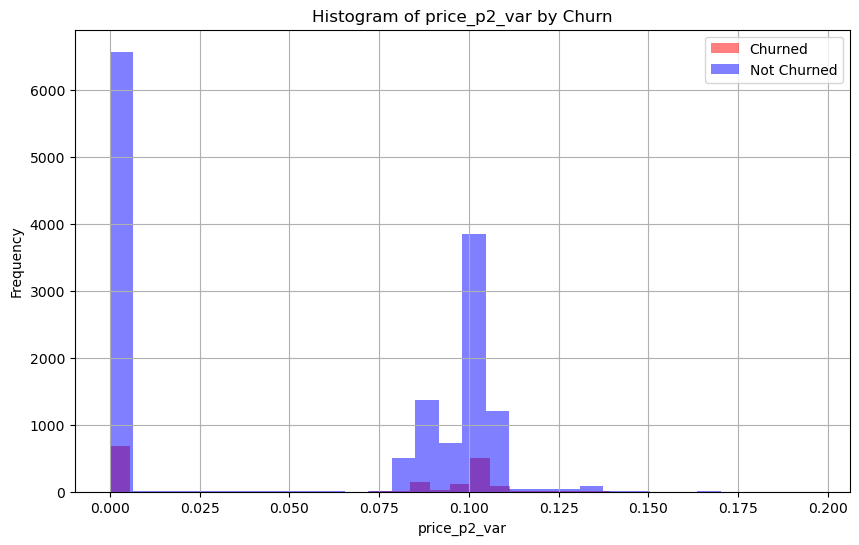

In [65]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['price_p2_var'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['price_p2_var'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('price_p2_var')
plt.ylabel('Frequency')
plt.title('Histogram of price_p2_var by Churn')
plt.legend()
plt.show()

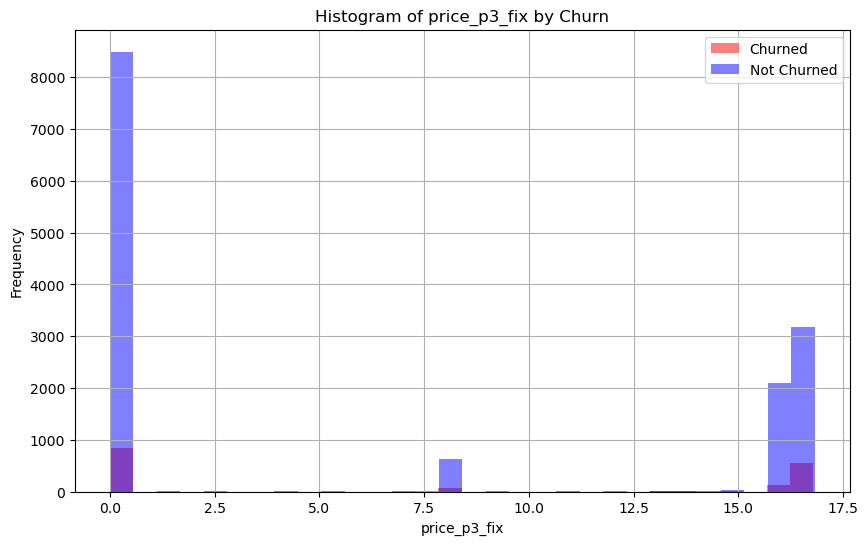

In [67]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['price_p3_fix'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['price_p3_fix'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('price_p3_fix')
plt.ylabel('Frequency')
plt.title('Histogram of price_p3_fix by Churn')
plt.legend()
plt.show()

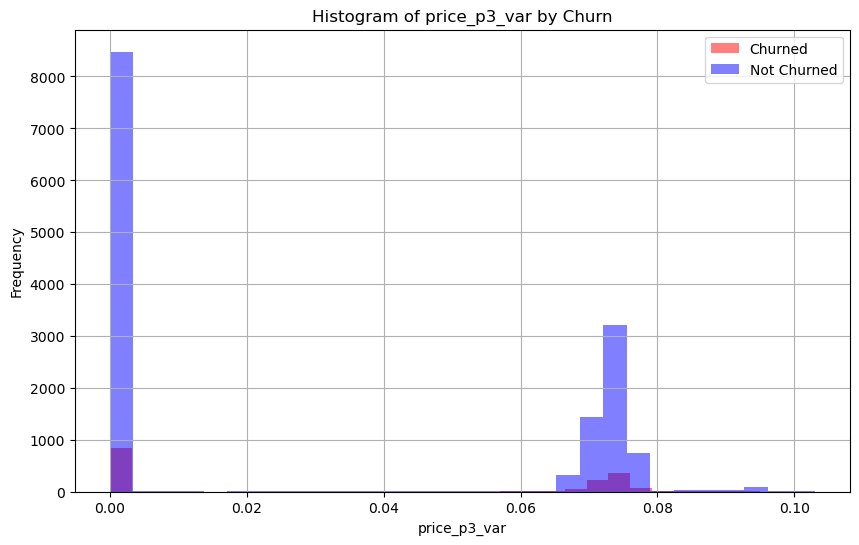

In [68]:
plt.figure(figsize=(10, 6))
electricity_table[electricity_table['churn'] == 1]['price_p3_var'].hist(alpha=0.5, color='red', bins=30, label='Churned')
electricity_table[electricity_table['churn'] == 0]['price_p3_var'].hist(alpha=0.5, color='blue', bins=30, label='Not Churned')
plt.xlabel('price_p3_var')
plt.ylabel('Frequency')
plt.title('Histogram of price_p3_var by Churn')
plt.legend()
plt.show()

In [69]:
# dropping columns with over 50% of missing value 
electricity_table.drop(columns = ['activity_new', 'campaign_disc_ele','forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons','date_first_activ'],axis = 1,inplace = True )

In [70]:
numerical_columns = electricity_table.select_dtypes(include=['int', 'float']).columns

In [71]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = electricity_table[numerical_columns].corr()

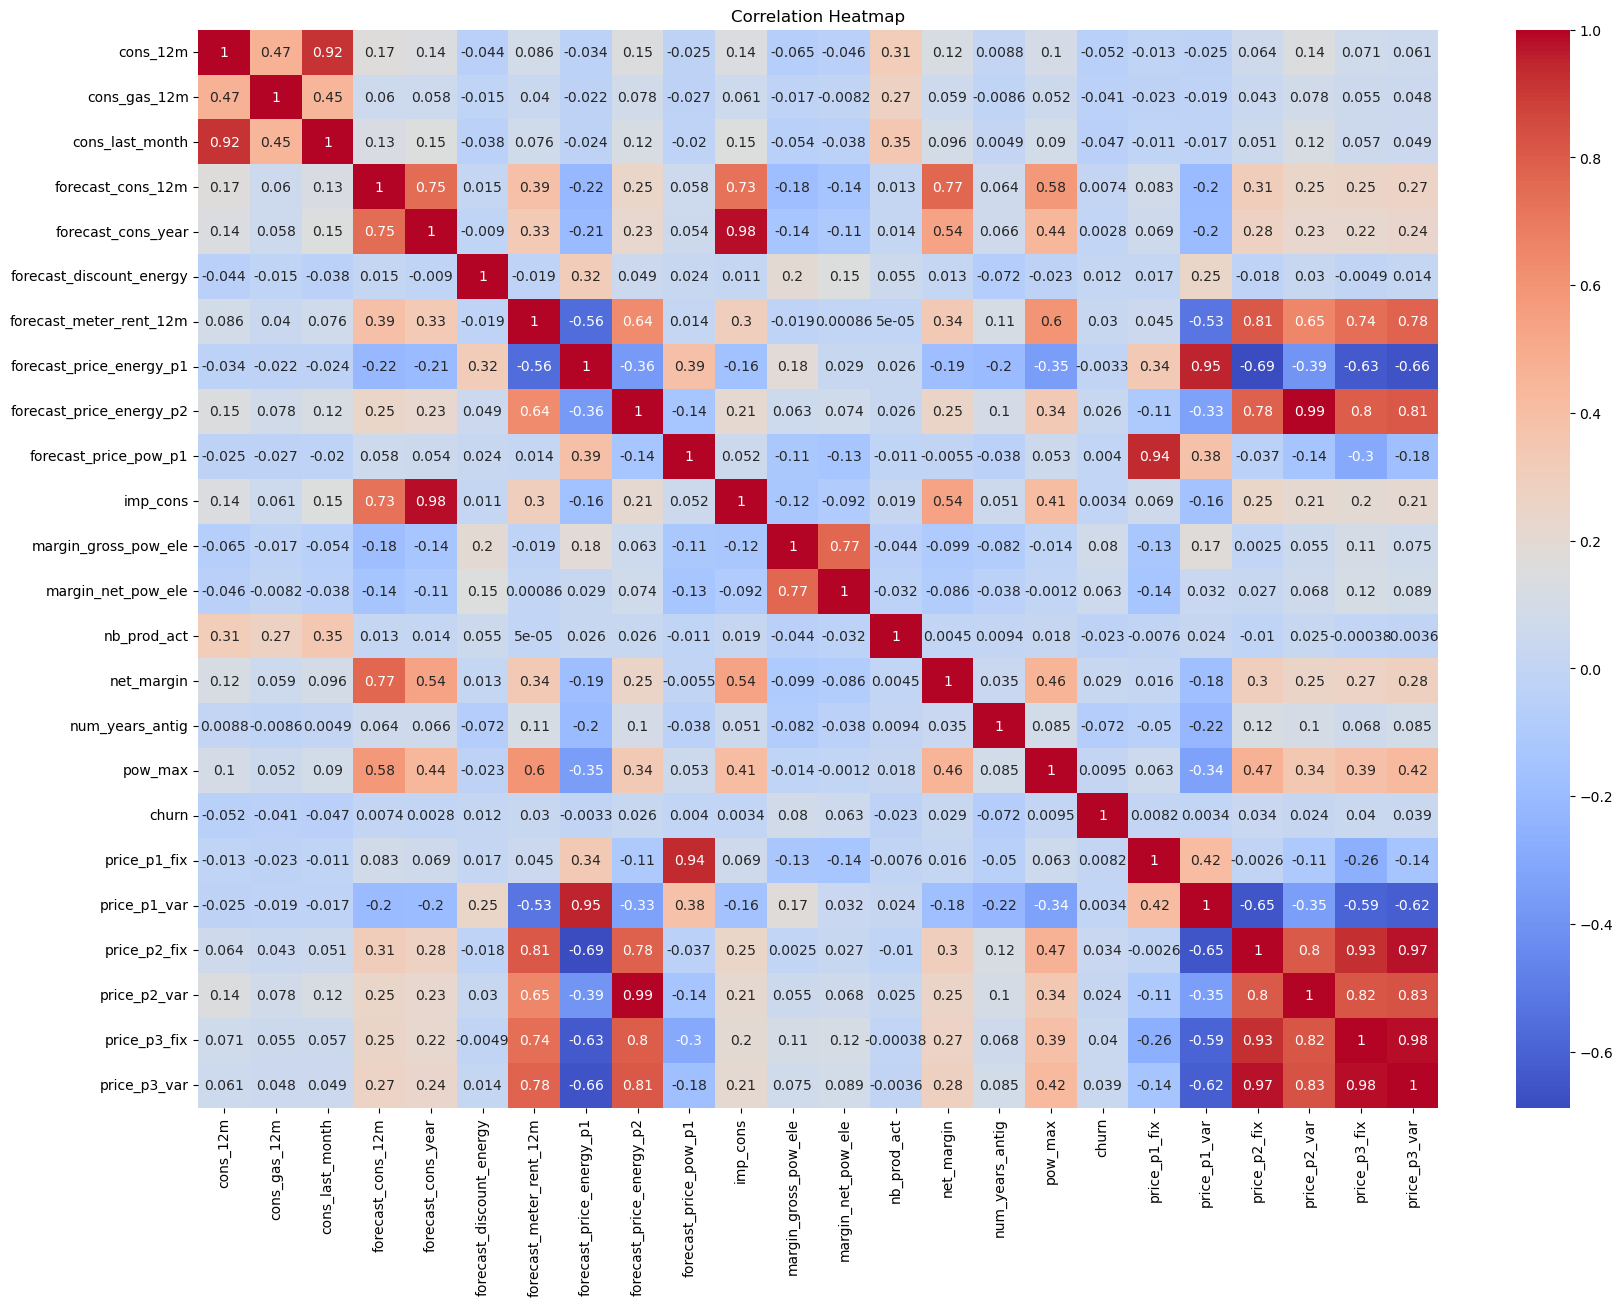

In [72]:
# Plot the heatmap
# Set the figure size (width and height in inches)
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Insight 
1.	Customer with margin net power for electricity 0 -5000 are at high risk of churning 

2.	Customer with forecasted bill for electricity for the next 12 months with value 0 at high risk o
Churning.
This suggest that customers who are not consuming electricity (margin next power) and do not have a significant financial commitment (forecasted bill) are more likely to switch to a different provider.

3.	Channel Sale
Customer acquired through channel 2 are at higher risk of churning.

4.	Congas 12 months   
Customer who have consumed 0 gas in the past 12 months are at a higher risk of churning. 
This suggest that customer who are not using gas services are most likely to conceal their subscription or switch to a different provider.

5.	Forecasted meter rent 12 months
Customer with forecasted meter rent with 0 dollar for the next 12 months are at a higher risk of churning. 

6.	Has gas 
Customer who have gas = false at higher risk of churning
This suggest that the absence of gas services may be a contributing factor to customer dissatisfaction and likelihood to churn.

7.	Origin up
Customer acquire through origin up 3 at churning as compared to customer acquire through other origin type.

8.	Forecasted price energy p2
Customer who were forecasted to have low price of energy in period 2 were more likely to churn. This suggest that customers who anticipate low energy cost may not feel incentivized to stay with the company.

9.	IMP_con
Customer with important consumption matrix (e.g. energy usage datac onsumption) = 0 are more likely to churn.
This suggest that customers are not actively using the services or consuming the product are t the higher risk of churning.

10.	Number year antiq
Customer with tenure 2-6 years are more likely to churn. 
This suggest that customer are have been with the company for 2-6 years are at a higher risk of switching to a different provider.

11.	Margin gross power ele
Customers who were not generating any profit or value from their electricity usage were more likely to churn in other words, customers where not seen any financial benefits from using the electricity service were more likely to churn


# RECOMENDATION


 1.Segmentation and Targeting:


Segment customers based on their margin net power for electricity, forecasted bill, gas consumption, forecasted meter rent, presence of gas services, forecasted price of energy, important consumption metrics, and tenure.
Prioritize customers with zero margin net power, zero forecasted bill, zero gas consumption, zero forecasted meter rent, absence of gas services, low forecasted price of energy, zero important consumption metrics, and tenure of 2-6 years for targeted interventions.
Retention Strategy:

2.Implement targeted retention strategies for identified high-risk segments.
Offer personalized discounts, promotions, or incentives to customers who show low energy usage, zero gas consumption, or low forecasted energy prices to increase their perceived value.
Provide proactive outreach and engagement programs to educate customers on the benefits of continued service usage, especially those who have not been actively consuming energy or gas services.
Enhanced Service Offerings:

Enhance service offerings to add value for customers with zero gas consumption or forecasted meter rent. This could include bundled services, energy efficiency programs, or alternative energy solutions.
Introduce loyalty programs or rewards for long-tenured customers (2-6 years) to increase their engagement and satisfaction with the company.
Improved Customer Experience:

Enhance the customer experience for customers acquired through channel 2 or origin type 3 to reduce churn. This may involve addressing pain points specific to these acquisition channels and providing additional support or resources.
Implement measures to improve satisfaction among customers with important consumption metrics equal to zero, ensuring they receive adequate support and assistance in utilizing the services effectively.
Data-Driven Insights:

Continuously monitor customer behavior and consumption patterns to identify early signs of dissatisfaction or potential churn.
Utilize advanced analytics and machine learning algorithms to predict churn likelihood and proactively intervene with targeted retention efforts.
Communication and Education:

Communicate transparently with customers regarding pricing, billing, and service offerings to manage expectations and reduce dissatisfaction.
Educate customers on the benefits of gas services and how they can optimize their energy consumption to maximize value.
By implementing these recommendations, the company can mitigate churn risk and improve overall customer retention and satisfaction.








In [74]:
# TO CHANGE THE DATATYPE FROM OBJECT TO DATETIME
electricity_table['date_activ'] = pd.to_datetime(electricity_table['date_activ'])
electricity_table['date_end'] = pd.to_datetime(electricity_table['date_end'])
electricity_table['date_modif_prod'] = pd.to_datetime(electricity_table['date_modif_prod'])
electricity_table['date_renewal'] = pd.to_datetime(electricity_table['date_renewal'])

In [75]:
electricity_table.info() # TO CONFIRM IT HAS CHANGED

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   channel_sales             11878 non-null  object        
 2   cons_12m                  16096 non-null  int64         
 3   cons_gas_12m              16096 non-null  int64         
 4   cons_last_month           16096 non-null  int64         
 5   date_activ                16096 non-null  datetime64[ns]
 6   date_end                  16094 non-null  datetime64[ns]
 7   date_modif_prod           15939 non-null  datetime64[ns]
 8   date_renewal              16056 non-null  datetime64[ns]
 9   forecast_cons_12m         16096 non-null  float64       
 10  forecast_cons_year        16096 non-null  int64         
 11  forecast_discount_energy  15970 non-null  float64       
 12  forecast_meter_ren

### Forecasted Consumption for the Year (forecast_cons_year): Customers with higher forecasted consumption for the year are more likely to churn. This could indicate dissatisfaction with the anticipated energy costs or inefficiencies in the company's pricing or service offerings.

Sales Channel (channel_sales): Customers acquired through certain sales channels exhibit higher churn rates compared to others. Specifically, customers acquired through direct sales channels show a higher propensity to churn, suggesting potential issues with the effectiveness of direct marketing strategies or the quality of customer interactions during the sales process.

Origin of Supply (origin_up): Customers originating from specific regions or energy sources are more likely to churn. This could be attributed to regional economic factors, differences in service quality across regions, or disparities in the availability of alternative energy providers.

Gas Supply (has_gas): Customers with gas supply contracts are less likely to churn compared to those without gas supply. Offering bundled electricity and gas services may enhance customer retention by providing added value and convenience, thereby reducing the likelihood of customers switching to competitors.

Forecasted Discount on Energy (forecast_discount_energy): Customers with lower forecasted discounts on energy are more likely to churn. This suggests that competitive pricing and discount offerings play a significant role in customer retention. Implementing targeted discount programs or price promotions may help mitigate churn among price-sensitive customers.

Price Fix and Variable Components (price_p1_fix, price_p1_var): Customers with higher fixed and variable prices for electricity are more likely to churn. This indicates that pricing transparency, competitiveness, and perceived value-for-money are critical factors influencing customer retention. Adjusting pricing strategies to offer competitive rates or introducing flexible pricing options may improve customer satisfaction and loyalty.

Profit Margins (net_margin, margin_gross_pow_ele): Customers with lower net margins and gross power margins are more likely to churn. Low profitability may reflect operational inefficiencies, pricing discrepancies, or increased competition in the market. Optimizing operational costs, enhancing service quality, and strategically managing pricing structures can help improve margins and reduce churn.

By identifying and addressing these key factors contributing to customer churn, the electricity company can implement targeted retention strategies to improve customer satisfaction, enhance loyalty, and reduce overall churn rates.









#  HANDLING  MISSING  VALUE

In [76]:
# Calculate mean or median of the non-missing values
mean_date = electricity_table['date_modif_prod'].mean()

mean_date

Timestamp('2012-12-14 18:33:40.553359872')

In [77]:
 median_date = electricity_table['date_modif_prod'].median()
median_date

Timestamp('2013-05-01 00:00:00')

In [78]:
electricity_table = electricity_table.dropna(subset=['date_modif_prod'])

In [79]:
new_channel = 'new_channel' # CREATING A VARIABLE TO RENAME THE NAN VALUE
electricity_table['channel_sales'].fillna(new_channel,inplace = True) # RENAMING THE NAN VALUE
# RENAMING THE CHANNEL_SALES COLUMN
rename_channel = {
    'lmkebamcaaclubfxadlmueccxoimlema': 'channel1',
    'foosdfpfkusacimwkcsosbicdxkicaua': 'channel2',
    'usilxuppasemubllopkaafesmlibmsdf': 'channel3',
    'ewpakwlliwisiwduibdlfmalxowmwpci': 'channel4',
    'epumfxlbckeskwekxbiuasklxalciiuu': 'channel5',
    'sddiedcslfslkckwlfkdpoeeailfpeds': 'channel6',
    'fixdbufsefwooaasfcxdxadsiekoceaa': 'channel7',
    'new_channel': 'online'
    
}    

electricity_table['channel_sales'] = electricity_table['channel_sales'].replace(rename_channel)

In [80]:
new_origin = 'new_origin' # creating a new variable to rename the origin_up colum
electricity_table['origin_up'].fillna(new_origin,inplace = True) # fillng it up with new_origin
# renaming my column so it can be readable
rename_dict = {
    'ldkssxwpmemidmecebumciepifcamkci': 'origin1',
    'kamkkxfxxuwbdslkwifmmcsiusiuosws': 'origin2',
    'lxidpiddsbxsbosboudacockeimpuepw': 'origin3',
    'usapbepcfoloekilkwsdiboslwaxobdp': 'origin4',
    'ewxeelcelemmiwuafmddpobolfuxioce': 'origin5',
    'default_value' :'new_origin'
}

electricity_table['origin_up'] = electricity_table['origin_up'].replace(rename_dict)

In [81]:
# to get the mean of the value
forecast_mean = electricity_table['forecast_discount_energy'].mean()

In [82]:
# filling it with the mean
electricity_table['forecast_discount_energy'].fillna(forecast_mean, inplace=True)

In [83]:
# to get the median of the value
eng_med = electricity_table['forecast_price_energy_p1'].median()
eng_med

0.142881

In [84]:
# filling it with the median
electricity_table['forecast_price_energy_p1'].fillna(eng_med, inplace=True)

In [85]:
# to get the median of the value
for_price = electricity_table['forecast_price_energy_p2'].median()
for_price

0.086163

In [86]:
# filling it with the median
electricity_table['forecast_price_energy_p2'].fillna(for_price, inplace=True)

In [87]:
# to get the mean of the value
for_price1 = electricity_table['forecast_price_pow_p1'].mean()
for_price1

43.53610217451372

In [88]:
# filling it with the mean
electricity_table['forecast_price_pow_p1'].fillna(for_price1, inplace=True)

In [89]:
electricity_table['margin_gross_pow_ele'].value_counts()

margin_gross_pow_ele
 26.04     265
 33.12     242
 0.00      175
 29.76     173
 34.68     168
          ... 
-2.37        1
 373.43      1
 15.19       1
 11.57       1
-53.34       1
Name: count, Length: 2966, dtype: int64

In [90]:
# filling it with the mean
margin = electricity_table['margin_gross_pow_ele'].mean()
margin

22.452415546904433

In [91]:
# filling it with the mean
electricity_table['margin_gross_pow_ele'].fillna(margin, inplace=True)

In [92]:

electricity_table.dropna(inplace=True) # to drop all the nan values

In [93]:
electricity_table.isnull().sum()

id                          0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
churn                       0
price_p1_fix                0
price_p1_var                0
price_p2_fix                0
price_p2_var                0
price_p3_fix                0
price_p3_var                0
dtype: int64

In [94]:
16097-15797


300

# FEATURES  ENGINEERING

In [95]:
 #Calculate monthly forecasted consumption
electricity_table['Monthly_forecast_cons'] = electricity_table['forecast_cons_year'] / 12

# Calculate total discount over 12 months
electricity_table['total_discount'] = electricity_table['forecast_discount_energy']
electricity_table['forecast_mnthly_discount'] = electricity_table['forecast_discount_energy']/12

# Calculate the number years between certain dates

#electricity_table['years_active'] = electricity_table['date_activ'] / 365


# Calculate the consumption trends
#electricity_table['electricity_consumption_trend'] = electricity_table['cons_12m'] / electricity_table['years_active']
#electricity_table['gas_consumption_trend'] = electricity_table['cons_gas_12m'] / electricity_table['years_active']


# Calculate the discount ratio
electricity_table['discount_to_consumption_ratio'] = electricity_table['forecast_discount_energy'] / electricity_table['forecast_cons_year']

# Compare forecasted consumption with actual consumption
electricity_table['forecast_error_consumption'] = electricity_table['forecast_cons_12m'] - electricity_table['forecast_cons_year']

# Calculate forecast accuracy
electricity_table['forecast_accuracy_consumption'] = abs(electricity_table['forecast_error_consumption']) / electricity_table['forecast_cons_year']

# Calculate ratios involving maximum power
electricity_table['power_to_consumption_ratio'] = electricity_table['margin_net_pow_ele'] / electricity_table['cons_12m']


# Calculate the ratio of forecasted meter rent to forecasted consumption
electricity_table['meter_rent_to_forecasted_consumption_ratio'] = electricity_table['forecast_meter_rent_12m'] / electricity_table['forecast_cons_12m']


# Calculate differences in gross margin and net margin
electricity_table['gross_net_margin_difference'] = electricity_table['margin_net_pow_ele'] - electricity_table['net_margin']

# Calculate ratios involving maximum power
electricity_table['power_to_consumption_ratio'] = electricity_table['margin_net_pow_ele'] / electricity_table['cons_12m']

In [96]:
# Calculate Forecasted Base Bill per period
electricity_table['Forecast_Base_Bill_ele1'] = electricity_table['price_p1_fix'] + (electricity_table['price_p1_var'] * electricity_table['Monthly_forecast_cons'])
electricity_table['Forecast_Base_Bill_ele2'] = electricity_table['price_p2_fix'] + (electricity_table['price_p2_var'] * electricity_table['Monthly_forecast_cons'])
electricity_table['Forecast_Base_Bill_ele3'] = electricity_table['price_p3_fix'] + (electricity_table['price_p3_var'] * electricity_table['Monthly_forecast_cons'])
electricity_table['total_Forecast_var_bill'] = electricity_table['price_p1_var'] + electricity_table['price_p2_var'] + electricity_table['price_p3_var']
electricity_table['total_Forecast_fix_bill'] = electricity_table['price_p1_fix'] + electricity_table['price_p2_fix'] + electricity_table['price_p3_fix']


In [97]:
electricity_table['past_con'] = electricity_table['forecast_cons_12m'] - electricity_table['cons_12m']
electricity_table['present_con'] = electricity_table['forecast_cons_12m'] - electricity_table['forecast_cons_year']
electricity_table['forcast_mthly_meter_rent'] = electricity_table['forecast_meter_rent_12m']/12

In [98]:
# Calculate tenure as the difference between 'end_date' and 'active'
electricity_table['tenure'] = (electricity_table['date_end'] - electricity_table['date_activ']).dt.days

In [99]:
bin_edges = [0, 3, 6, 9, 12, 15, 17]  # Example bin edges

In [100]:
# Define bin labels
bin_labels = ['0-3 years', '3-6 years', '6-9 years', '9-12 years', '12-15 years', '15-17 years']

In [101]:
# Bin the 'num_years_antig' feature into categories
electricity_table['num_years_antig_binned'] = pd.cut(electricity_table['num_years_antig'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# CORRELATION


In [104]:
numerical_columns1 = electricity_table.select_dtypes(include=['int', 'float']).columns

In [105]:
# Calculate the correlation matrix for numerical columns
correlation_matrix1= electricity_table[numerical_columns1].corr()

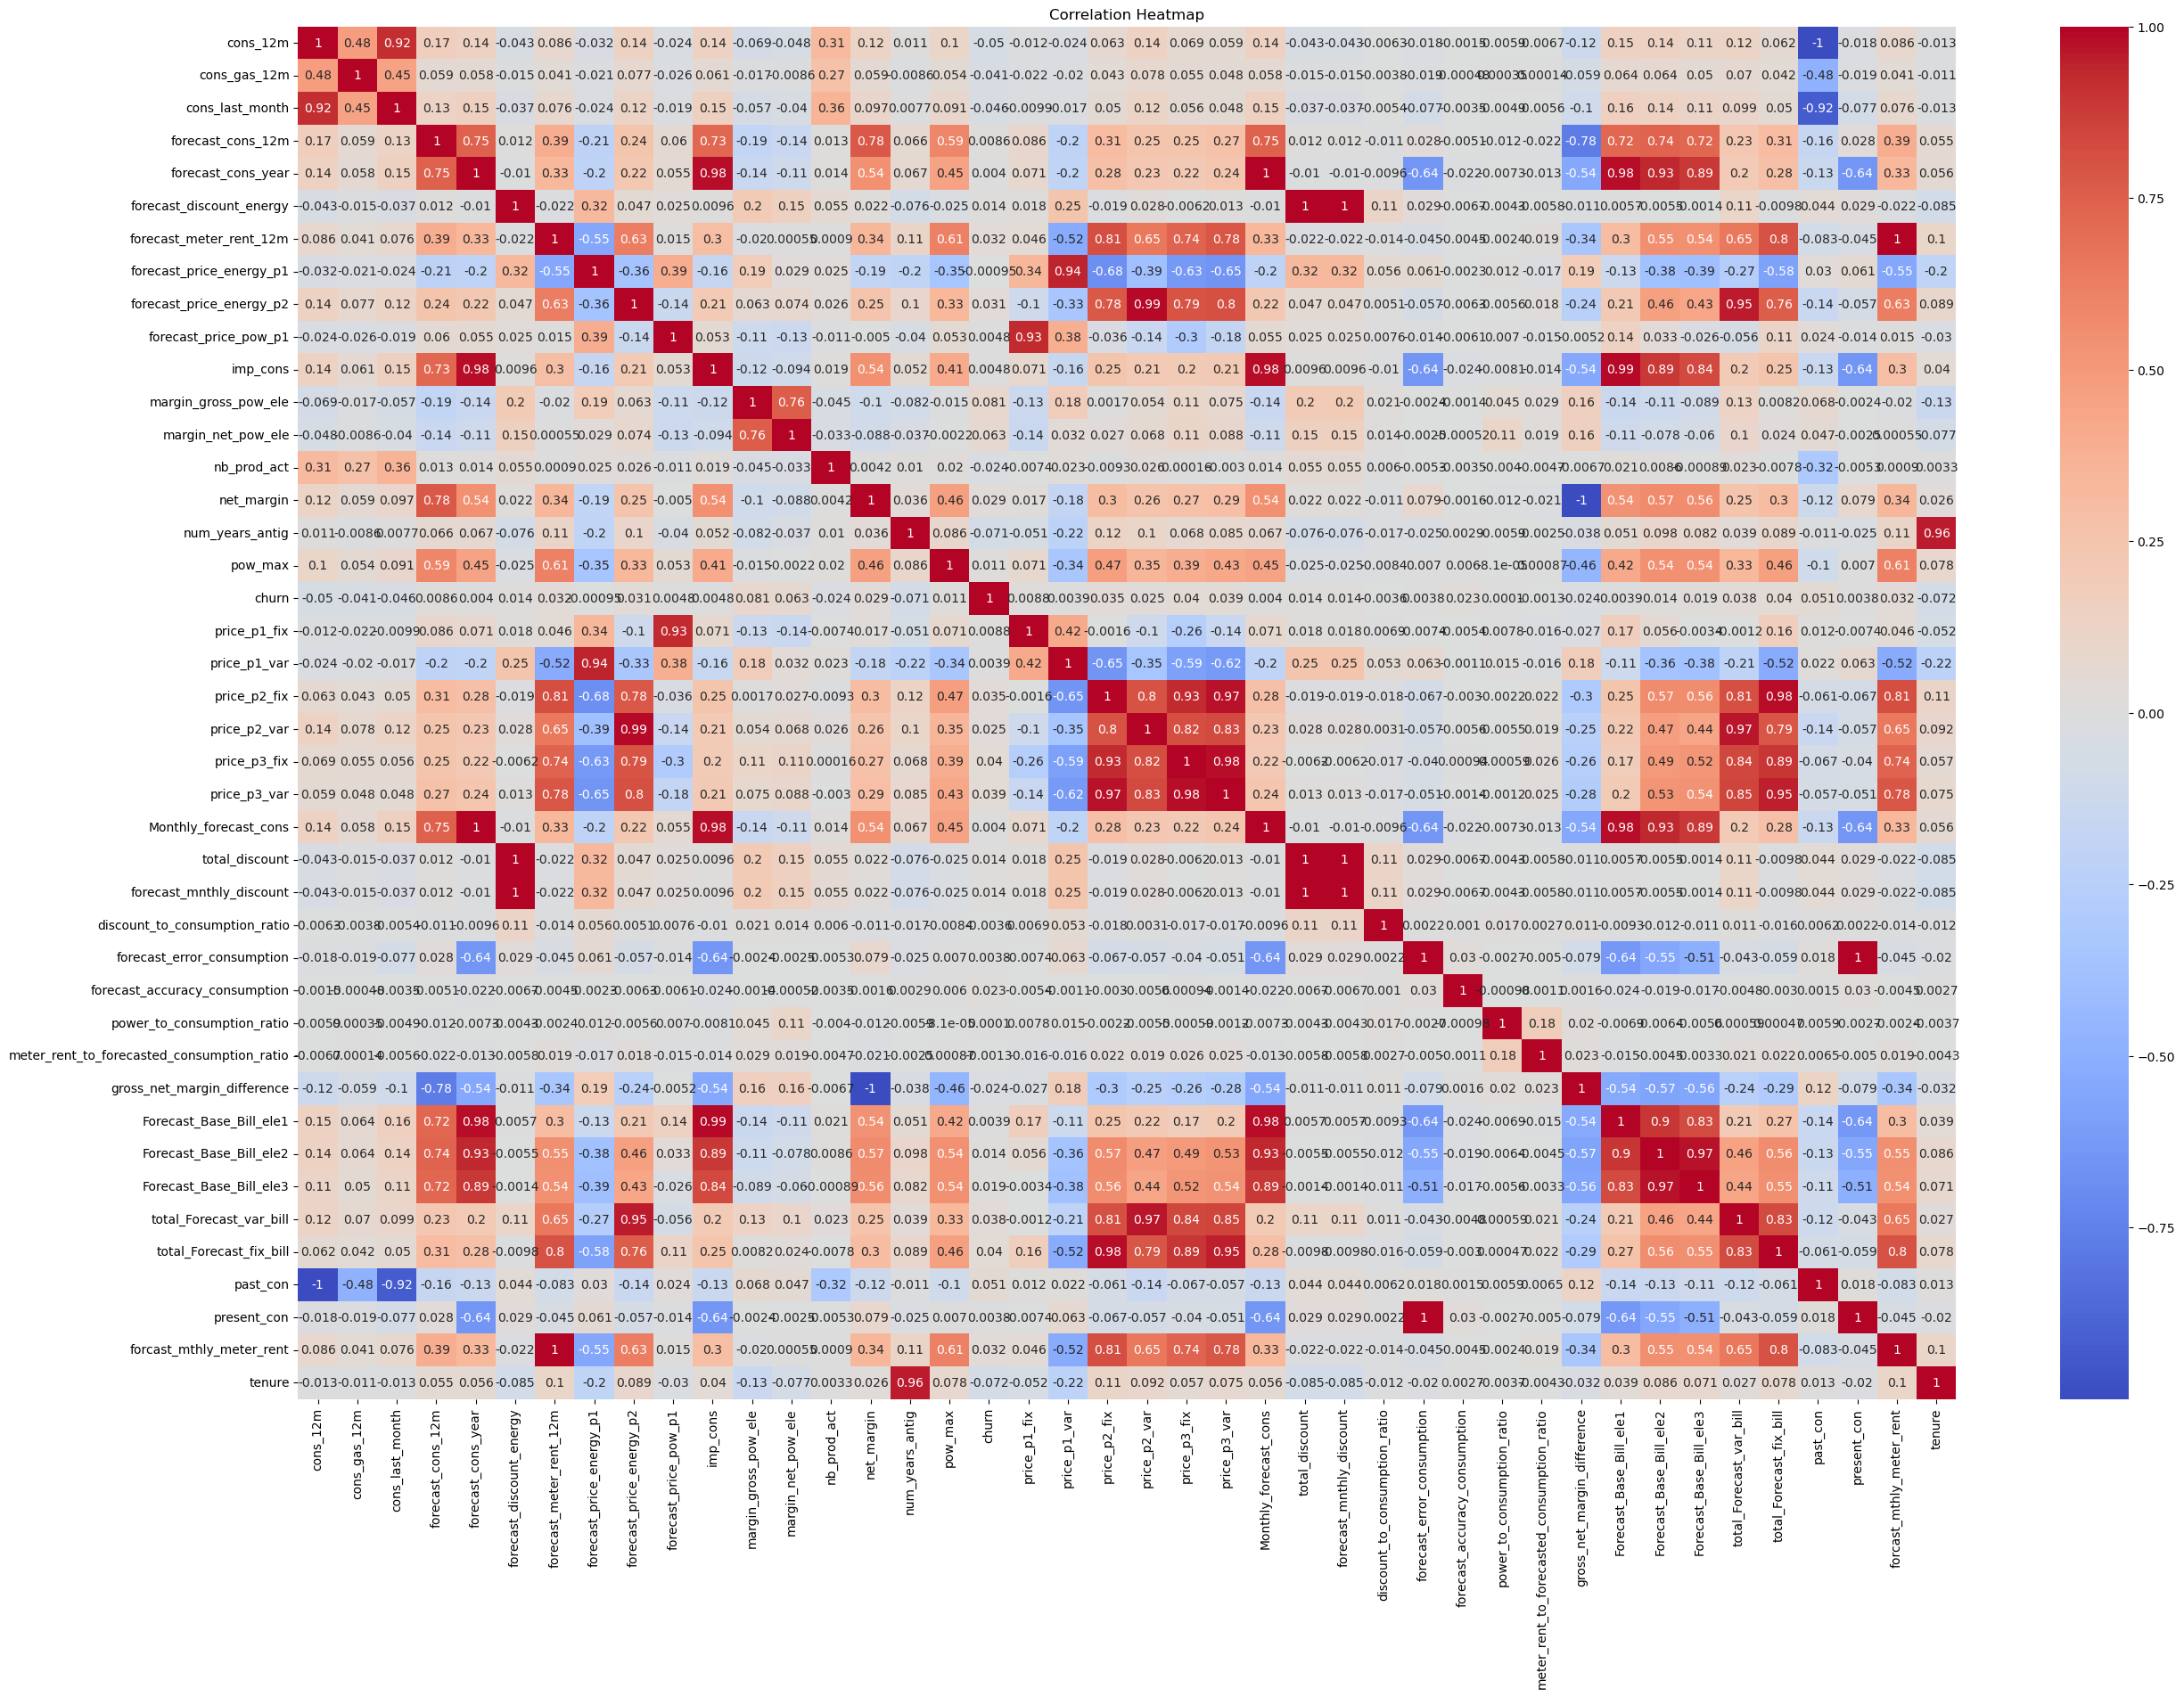

In [106]:
# Plot the heatmap
# Set the figure size (width and height in inches)
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

## checking the correlation with categorical columns

In [107]:
from scipy.stats import f_oneway

In [108]:
# List of categorical columns you want to analyze
categorical_columns = ['channel_sales', 'has_gas', 'origin_up','num_years_antig_binned']  # Add your columns here

In [109]:
# ANOVA: Analyzing the relationship between categorical columns and the target variable
for col in categorical_columns:
    # Group the data by categorical column and get the values of the target variable for each group
    groups = [group['churn'] for name, group in electricity_table.groupby(col)]
    
    # Perform one-way ANOVA
    f_stat, p_val = f_oneway(*groups)
    
    print(f"ANOVA results for {col}:")
    print(f"F-statistic: {f_stat}, p-value: {p_val}\n")

ANOVA results for channel_sales:
F-statistic: 20.16374800002142, p-value: 1.2556061340335916e-23

ANOVA results for has_gas:
F-statistic: 18.65369469321354, p-value: 1.576942431563647e-05

ANOVA results for origin_up:
F-statistic: 33.89412738806143, p-value: 1.4595954436594088e-34

ANOVA results for num_years_antig_binned:
F-statistic: 10.668186257504408, p-value: 2.9791319353882094e-10



### dropping features that are strongly correlated 

In [110]:
electricity_table.drop(['cons_12m','forecast_cons_12m','Monthly_forecast_cons','present_con',
                        'total_Forecast_fix_bill','total_Forecast_var_bill','Forecast_Base_Bill_ele2',
                        'total_discount','price_p2_var','price_p1_fix','margin_net_pow_ele','net_margin',
                        'forecast_cons_year'],axis = 1,inplace = True)

electricity_table.drop(['forecast_discount_energy','price_p2_fix','tenure','price_p3_var','price_p1_var'],axis =1,inplace = True)
electricity_table.drop(columns=['discount_to_consumption_ratio', 'forecast_accuracy_consumption'], inplace=True)
electricity_table.drop(['forecast_meter_rent_12m','imp_cons'],axis = 1,inplace = True)

In [111]:
electricity_table.drop(columns=['meter_rent_to_forecasted_consumption_ratio', 'power_to_consumption_ratio'], inplace=True)

In [112]:
electricity_table.columns # to confirm it has been dropped

Index(['id', 'channel_sales', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'has_gas', 'margin_gross_pow_ele',
       'nb_prod_act', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_p3_fix', 'forecast_mnthly_discount',
       'forecast_error_consumption', 'gross_net_margin_difference',
       'Forecast_Base_Bill_ele1', 'Forecast_Base_Bill_ele3', 'past_con',
       'forcast_mthly_meter_rent', 'num_years_antig_binned'],
      dtype='object')

# CHECKING FOR OUTLIERS

In [113]:
electricity_table.describe()

,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,margin_gross_pow_ele,...,pow_max,churn,price_p3_fix,forecast_mnthly_discount,forecast_error_consumption,gross_net_margin_difference,Forecast_Base_Bill_ele1,Forecast_Base_Bill_ele3,past_con,forcast_mthly_meter_rent
count,1.588400e+04,1.588400e+04,15884,15884,15884,15884,15884.000000,15884.000000,15884.000000,15884.000000,...,15884.000000,15884.000000,15884.000000,15884.000000,15884.000000,15884.000000,15884.000000,15884.000000,1.588400e+04,15884.000000
mean,3.184109e+04,1.926331e+04,2011-01-09 15:47:22.105263104,2016-07-28 03:23:42.412490496,2012-12-12 08:54:30.914127616,2015-07-21 03:05:34.525308416,0.135955,0.053171,43.533433,22.450512,...,20.525878,0.098842,6.446518,0.081619,458.697740,-196.675103,63.577921,15.089091,-1.892819e+05,5.858454
min,-3.037000e+03,-9.138600e+04,2000-07-25 00:00:00,2013-05-06 00:00:00,2000-07-25 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,-0.122184,-525.540000,...,1.000000,0.000000,0.000000,0.000000,-156189.220000,-24570.410000,-1154.814347,-100.115638,-1.609664e+07,-20.246667
25%,0.000000e+00,0.000000e+00,2010-01-11 00:00:00,2016-04-27 00:00:00,2010-08-06 18:00:00,2015-04-17 00:00:00,0.115237,0.000000,40.606701,11.950000,...,12.500000,0.000000,0.000000,0.000000,-25.260000,-258.225000,44.341005,0.000000,-4.611819e+04,1.352292
50%,0.000000e+00,8.960000e+02,2011-02-24 00:00:00,2016-08-01 00:00:00,2013-04-25 12:00:00,2015-07-27 00:00:00,0.142881,0.086163,44.311378,21.000000,...,13.856000,0.000000,0.000000,0.000000,323.875000,-97.190000,47.833383,0.000000,-1.374740e+04,1.619583
75%,0.000000e+00,4.106250e+03,2012-04-17 00:00:00,2016-11-01 00:00:00,2015-05-24 00:00:00,2015-10-30 00:00:00,0.146348,0.098837,44.311378,29.640000,...,19.800000,0.000000,16.248110,0.000000,998.257500,-27.577500,65.207610,22.234703,-5.171583e+03,10.957500
max,4.188440e+06,4.538720e+06,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,0.273963,0.195975,59.444710,374.640000,...,500.000000,1.000000,16.818917,4.166667,80901.160000,4147.490000,1594.385037,1007.695182,1.252760e+05,200.974167
std,1.777365e+05,8.198133e+04,NaN,NaN,NaN,NaN,0.026189,0.048531,5.209478,23.744065,...,21.456848,0.298459,7.760207,0.425971,3506.753787,368.725838,52.854807,32.358224,6.710904e+05,6.587129


## DETECTING OUTLIER WITH PERCENTILE

In [114]:
lower_percentile = 0.01  # 1st percentile
upper_percentile = 0.99  # 99th percentile

In [115]:
# Calculate the 1st and 99th percentiles for each numeric column
percentiles = electricity_table.select_dtypes(include='number').quantile([lower_percentile, upper_percentile])

In [116]:
# Initialize a mask for outlier rows
outliers_mask = pd.Series(False, index=electricity_table.index)

In [117]:
for column in electricity_table.select_dtypes(include='number').columns:
    lower_bound = percentiles.loc[lower_percentile, column]
    upper_bound = percentiles.loc[upper_percentile, column]

In [118]:
# Update the mask with outliers in the current column
outliers_mask = outliers_mask | (
(electricity_table[column] < lower_bound) | (electricity_table[column] > upper_bound))

In [119]:
# Get the rows with outliers
outlier_rows = electricity_table[outliers_mask]

print(f"Number of rows with outliers: {len(outlier_rows)}")
print(outlier_rows)

Number of rows with outliers: 163
                                     id channel_sales  cons_gas_12m  \
333    89b3406c3ba717f1b788ceeb5af9e8b9      channel1             0   
340    d2a3c7fcd082980fdcdf3d50d13094ec        online             0   
375    4c9182ef8bee204189d302be3bc4ffaf      channel1             0   
550    4cd7a40fabd9de10660f924bffc95f36      channel1             0   
678    ad3998336af017b691e0f5fdb33ef886        online             0   
...                                 ...           ...           ...   
15491  8ac2dfc687ba568864c8bb022f7fedd2        online             0   
15553  4afc3e59c9aaca1d4a40716a771d1164      channel1             0   
15755  fbb668fb689f69249d4e2ff820b6ca33      channel1             0   
15973  05cc85b55c69aeb125e2c93af1d1d5f0        online             0   
16085  bba32ec6261eb61e2c561036f6e2c1aa      channel1             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
333              64047 2012-11-01 20

##  CAPPING OUTLIERS

In [120]:
lower_percentile = 0.01  # Lower bound (e.g., 1st percentile)
upper_percentile = 0.99  # Upper bound (e.g., 99th percentile)

# Separate numerical, datetime, and object columns
numerical_columns = electricity_table.select_dtypes(include='number').columns


# Calculate the lower and upper bounds for each numerical column
lower_bounds = electricity_table[numerical_columns].quantile(lower_percentile)
upper_bounds = electricity_table[numerical_columns].quantile(upper_percentile)

# Function to cap outliers in each numerical column
def cap_outliers(col, lower, upper):
    return col.clip(lower=lower, upper=upper)

# Apply capping to numerical columns
electricity_table[numerical_columns] = electricity_table[numerical_columns].apply(lambda col: cap_outliers(col, lower_bounds[col.name], upper_bounds[col.name]))



In [121]:
from scipy.stats import boxcox, yeojohnson

In [122]:
def balance_skewness(df):
    """
    Apply transformations to numerical columns in the DataFrame to balance skewness.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    
    Returns:
    pandas.DataFrame: A new DataFrame with transformed numerical columns.
    """
    
    # Select numerical columns
    numerical_columns = electricity_table.select_dtypes(include='number').columns
    
    # Apply transformations to each numerical column
    for col in numerical_columns:
        # Calculate skewness
        skewness = electricity_table[col].skew()
        
        # Apply appropriate transformation based on skewness
        if skewness > 1:
            # Positive skew: apply log transformation or square root transformation
            # Add 1 to avoid issues with log of zero
            electricity_table[col] = np.log1p(electricity_table[col])
        elif skewness < -1:
            # Negative skew: apply Box-Cox transformation or Yeo-Johnson transformation
            # Box-Cox transformation requires positive data; use Yeo-Johnson as a fallback
            electricity_table[col], _ = boxcox(electricity_table[col] + 1)
        
    return electricity_table

In [123]:
electricity_table['num_years_antig_binned'] = electricity_table['num_years_antig_binned'].astype('object') # changing the datatype from int to object

In [124]:
# encoding the categorical columns
encoder = ce.OneHotEncoder(cols = ['channel_sales','has_gas','origin_up','num_years_antig_binned'],use_cat_names = True)

In [125]:
encoder

OneHotEncoder(cols=['channel_sales', 'has_gas', 'origin_up',
                    'num_years_antig_binned'],
              use_cat_names=True)

In [128]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(electricity_table, random_state=42)

In [129]:
train_encoder = encoder.fit_transform(train)

In [130]:
train_encoder.head(5)

,id,channel_sales_channel2,channel_sales_channel1,channel_sales_channel3,channel_sales_online,channel_sales_channel4,channel_sales_channel5,channel_sales_channel6,cons_gas_12m,cons_last_month,...,Forecast_Base_Bill_ele1,Forecast_Base_Bill_ele3,past_con,forcast_mthly_meter_rent,num_years_antig_binned_3-6 years,num_years_antig_binned_0-3 years,num_years_antig_binned_9-12 years,num_years_antig_binned_6-9 years,num_years_antig_binned_12-15 years,num_years_antig_binned_15-17 years
3760,56dcc463e699dcb5286a836fcddd9be2,1,0,0,0,0,0,0,451,0,...,44.326190,0.000000,-470.21,1.279167,1,0,0,0,0,0
6537,fb8673f298a08b77ad62e7ccc82949da,0,1,0,0,0,0,0,0,31169,...,245.738784,0.000000,-49106.32,3.073333,1,0,0,0,0,0
3619,d5711656692a07151db05e0b0d18168d,1,0,0,0,0,0,0,0,3488,...,76.283792,37.328661,-17134.59,11.907500,1,0,0,0,0,0
14414,5d3c88d9b2e4d21b95c1c3e7860fcd07,0,0,1,0,0,0,0,0,1238,...,53.529312,23.828402,-11630.38,10.949167,1,0,0,0,0,0
14480,f30e696bc62fdb18ce7ebcf1df541d67,0,0,1,0,0,0,0,0,2260,...,64.010338,30.051282,-17583.03,12.252500,0,1,0,0,0,0


In [131]:
train_encoder.isnull().sum().sum()

0

In [132]:
train_encoder.drop(columns =['id','date_activ','date_end','date_modif_prod','date_renewal'], axis =1,inplace = True) # dropping the column not needed for prediction

In [133]:
train_encoder.head(5)

,channel_sales_channel2,channel_sales_channel1,channel_sales_channel3,channel_sales_online,channel_sales_channel4,channel_sales_channel5,channel_sales_channel6,cons_gas_12m,cons_last_month,forecast_price_energy_p1,...,Forecast_Base_Bill_ele1,Forecast_Base_Bill_ele3,past_con,forcast_mthly_meter_rent,num_years_antig_binned_3-6 years,num_years_antig_binned_0-3 years,num_years_antig_binned_9-12 years,num_years_antig_binned_6-9 years,num_years_antig_binned_12-15 years,num_years_antig_binned_15-17 years
3760,1,0,0,0,0,0,0,451,0,0.145711,...,44.326190,0.000000,-470.21,1.279167,1,0,0,0,0,0
6537,0,1,0,0,0,0,0,0,31169,0.164637,...,245.738784,0.000000,-49106.32,3.073333,1,0,0,0,0,0
3619,1,0,0,0,0,0,0,0,3488,0.115174,...,76.283792,37.328661,-17134.59,11.907500,1,0,0,0,0,0
14414,0,0,1,0,0,0,0,0,1238,0.116900,...,53.529312,23.828402,-11630.38,10.949167,1,0,0,0,0,0
14480,0,0,1,0,0,0,0,0,2260,0.115761,...,64.010338,30.051282,-17583.03,12.252500,0,1,0,0,0,0


In [134]:
X = train_encoder.drop('churn', axis=1)  
y = train_encoder['churn']

In [135]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

In [136]:
# Split the data into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [137]:
# Feature selection: Select the top k features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=15)  # Select top 10 features; adjust k as needed
Xr_train = selector.fit_transform(Xr_train, yr_train)
Xr_test = selector.transform(Xr_test)

In [138]:
# Get indices of selected features
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = [X.columns[i] for i in selected_indices]

print("Selected Features:", selected_features)

Selected Features: ['channel_sales_channel1', 'channel_sales_channel3', 'channel_sales_online', 'channel_sales_channel4', 'cons_last_month', 'has_gas_t', 'margin_gross_pow_ele', 'nb_prod_act', 'num_years_antig', 'origin_up_origin2', 'origin_up_origin1', 'past_con', 'num_years_antig_binned_3-6 years', 'num_years_antig_binned_9-12 years', 'num_years_antig_binned_6-9 years']


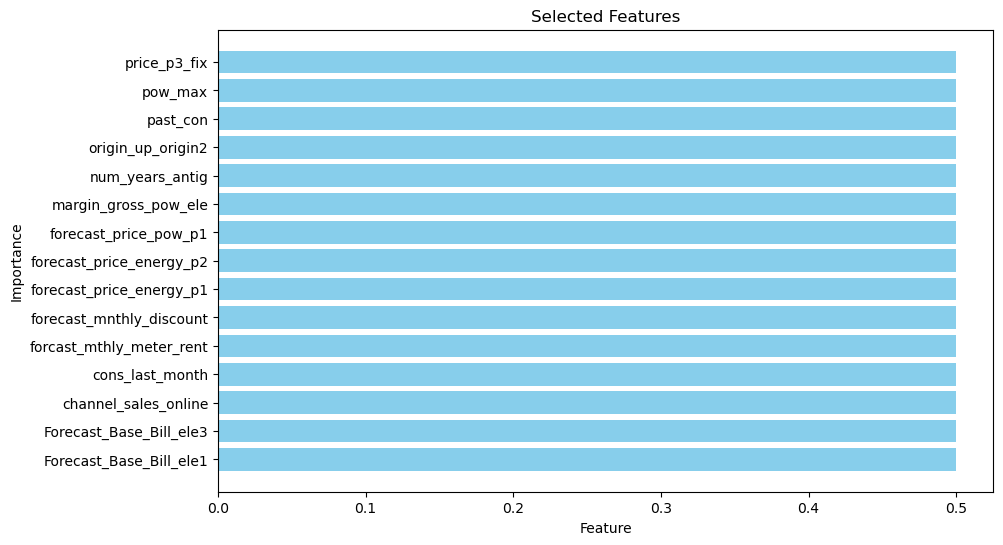

In [275]:
# Sort the selected features by name
selected_features.sort()

# Plot the selected features
plt.figure(figsize=(10, 6))
plt.barh(selected_features, width=0.5, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Selected Features')
plt.show()

In [252]:
# Standardize the training set
scaler = StandardScaler()
Xr_train = scaler.fit_transform(Xr_train)


In [253]:
# Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(Xr_train, yr_train)


RandomForestClassifier(random_state=42)

In [254]:
# Evaluate the classifier
y_pred = clf.predict(Xr_test)
print("Classification Report:")
print(classification_report(yr_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2192
           1       0.00      0.00      0.00      2105

    accuracy                           0.51      4297
   macro avg       0.26      0.50      0.34      4297
weighted avg       0.26      0.51      0.34      4297

Confusion Matrix:
[[2192    0]
 [2105    0]]


In [255]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [256]:
# Assuming train_encoder is your DataFrame
X = train_encoder.drop('churn', axis=1)
y = train_encoder['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature selection: Select top k features using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=15)
X_train_resampled = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test = selector.transform(X_test)

# Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2169
           1       0.31      0.14      0.19       214

    accuracy                           0.89      2383
   macro avg       0.61      0.55      0.57      2383
weighted avg       0.86      0.89      0.88      2383

Confusion Matrix:
[[2101   68]
 [ 184   30]]


# DECISION TREE CLASSIFER

In [139]:
# Assuming train_encoder is your DataFrame
X = train_encoder.drop('churn', axis=1)
y = train_encoder['churn']


In [140]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)


In [144]:
# Split the data into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)


In [145]:
model_smote = DecisionTreeClassifier(criterion = 'gini', random_state=100,max_depth = 6,min_samples_leaf = 6)

In [146]:
model_smote.fit(Xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=100)

In [147]:
y_pred =model_smote.predict(Xr_test) 

In [148]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
print("Classification Report:")
print(classification_report(yr_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.78      2192
           1       0.76      0.82      0.79      2105

    accuracy                           0.79      4297
   macro avg       0.79      0.79      0.79      4297
weighted avg       0.79      0.79      0.79      4297

Confusion Matrix:
[[1656  536]
 [ 372 1733]]


In [150]:
accuracy = accuracy_score(yr_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.7886897835699325


# RANDOM FOREST CLASSIFER

In [151]:
# Assuming train_encoder is your DataFrame
X = train_encoder.drop('churn', axis=1)
y = train_encoder['churn']


In [152]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)


In [153]:
# Split the data into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)


In [154]:
model_smote_rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state=100,max_depth = 6,min_samples_leaf = 6)

In [155]:
model_smote_rf.fit(Xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=6, random_state=100)

In [156]:
y_pred_rf =model_smote_rf.predict(Xr_test) 

In [157]:
print("Classification Report:")
print(classification_report(yr_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2192
           1       0.86      0.83      0.84      2105

    accuracy                           0.85      4297
   macro avg       0.85      0.85      0.85      4297
weighted avg       0.85      0.85      0.85      4297

Confusion Matrix:
[[1895  297]
 [ 348 1757]]


In [158]:
accuracy = accuracy_score(yr_test, y_pred_rf)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.8498952757737956


# SVM

In [159]:
# Assuming train_encoder is your DataFrame
X = train_encoder.drop('churn', axis=1)
y = train_encoder['churn']


In [160]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)


In [161]:
# Split the data into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)


In [162]:
# Create the SVM model
# Set the kernel, C, and gamma according to your preference or use defaults
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=100)


In [163]:
# Fit the model on the balanced training data
svm_model.fit(Xr_train, yr_train)


SVC(random_state=100)

In [164]:
# Predict class labels on the test data
y_pred_svm = svm_model.predict(Xr_test)

In [165]:
print("Classification Report:")
print(classification_report(yr_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.09      0.16      2192
           1       0.50      0.96      0.66      2105

    accuracy                           0.52      4297
   macro avg       0.61      0.53      0.41      4297
weighted avg       0.61      0.52      0.41      4297

Confusion Matrix:
[[ 198 1994]
 [  78 2027]]


In [166]:
accuracy = accuracy_score(yr_test, y_pred_svm)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.5178031184547358


#  LOGISTIC REGRESSION

In [167]:
# Assuming train_encoder is your DataFrame
X = train_encoder.drop('churn', axis=1)
y = train_encoder['churn']


In [168]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)


In [169]:
# Split the data into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)


In [170]:
log_reg = LogisticRegression(solver='liblinear', penalty='l2', C=1.0, class_weight='balanced', random_state=100)


In [171]:
# Fit the model on the training data
log_reg.fit(Xr_train, yr_train)


LogisticRegression(class_weight='balanced', random_state=100,
                   solver='liblinear')

In [172]:
# Predict class labels on the test data
y_pred_log = log_reg.predict(Xr_test)


In [173]:
print("Classification Report:")
print(classification_report(yr_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_log))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2192
           1       0.61      0.63      0.62      2105

    accuracy                           0.62      4297
   macro avg       0.62      0.62      0.62      4297
weighted avg       0.62      0.62      0.62      4297

Confusion Matrix:
[[1343  849]
 [ 778 1327]]


In [174]:
accuracy = accuracy_score(yr_test, y_pred_log)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.621363742145683


# KNN

In [175]:
# Assuming train_encoder is your DataFrame
X = train_encoder.drop('churn', axis=1)
y = train_encoder['churn']


In [176]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)


In [177]:
# Split the data into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [178]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [179]:
# Fit the model on the training data
knn_model.fit(Xr_train, yr_train)

KNeighborsClassifier()

In [180]:
# Predict class labels on the test data
y_pred_knn = knn_model.predict(Xr_test)

In [181]:
print("Classification Report:")
print(classification_report(yr_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      2192
           1       0.72      0.90      0.80      2105

    accuracy                           0.78      4297
   macro avg       0.80      0.78      0.78      4297
weighted avg       0.80      0.78      0.78      4297

Confusion Matrix:
[[1465  727]
 [ 210 1895]]


In [182]:
accuracy = accuracy_score(yr_test, y_pred_knn)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7819408889923202


# USING GradientBoostingClassifier

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
# Assuming train_encoder is your DataFrame
X = train_encoder.drop('churn', axis=1)
y = train_encoder['churn']

In [185]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

In [186]:
# Split the data into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [187]:
# Create a GradientBoostingClassifier instance
clf = GradientBoostingClassifier(random_state=42)

In [188]:
# Fit the classifier
clf.fit(Xr_train, yr_train)

GradientBoostingClassifier(random_state=42)

In [189]:
# Predict using the classifier on the transformed test data
y_pred_gb = clf.predict(Xr_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(yr_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(yr_test, y_pred_gb))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2192
           1       0.97      0.84      0.90      2105

    accuracy                           0.91      4297
   macro avg       0.92      0.91      0.91      4297
weighted avg       0.91      0.91      0.91      4297

Confusion Matrix:
[[2134   58]
 [ 342 1763]]


In [190]:
accuracy = accuracy_score(yr_test, y_pred_gb)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9069117989294857


In [191]:
# Calculate accuracy scores for each model
accuracy_scores = [
    accuracy_score(yr_test, y_pred),
    accuracy_score(yr_test, y_pred_rf),
    accuracy_score(yr_test, y_pred_svm),
    accuracy_score(yr_test, y_pred_log),
    accuracy_score(yr_test, y_pred_knn),
    accuracy_score(yr_test, y_pred_gb)
]

In [193]:
# Create a DataFrame to hold model names and accuracy scores
models = pd.DataFrame({
    'model': ['model_smote', 'model_smote_rf', 'svm_model', 'log_reg', 'knn_model', 'clf'],
    'ACCURACY': accuracy_scores
})

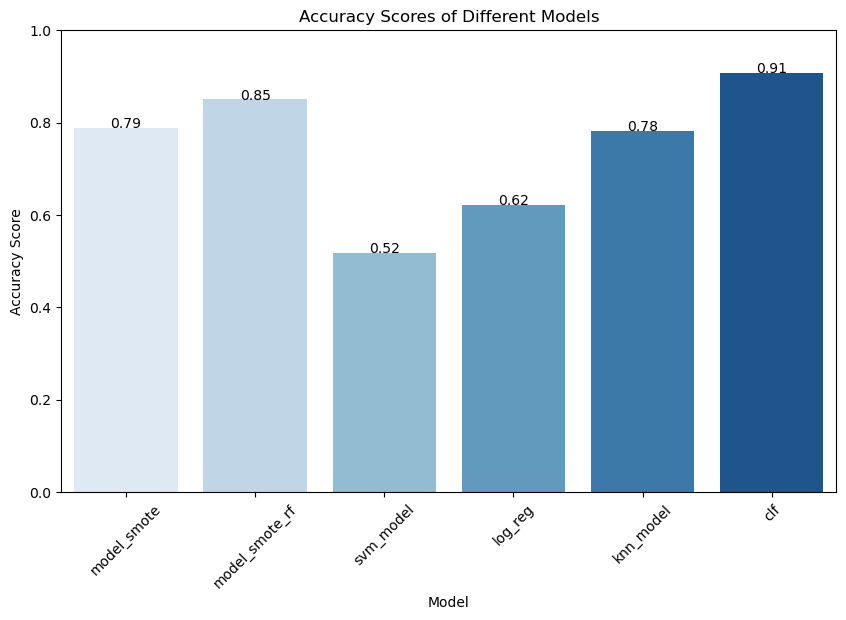

In [195]:
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='model', y='ACCURACY', data=models, palette='Blues')

# Annotate each bar with its accuracy score
for index, row in models.iterrows():
    barplot.text(row.name, row.ACCURACY, round(row.ACCURACY, 2), color='black', ha="center")

plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [197]:
# using the random forest classifer to check the features that made customer to churn
feature_importances = model_smote_rf.feature_importances_

# Creating a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [199]:
importance_df.head(10)

,Feature,Importance
18,origin_up_origin2,0.106498
3,channel_sales_online,0.088389
19,origin_up_origin1,0.076196
16,num_years_antig,0.070323
23,price_p3_fix,0.065099
10,forecast_price_energy_p2,0.058496
11,forecast_price_pow_p1,0.051661
17,origin_up_origin3,0.045468
31,num_years_antig_binned_3-6 years,0.044903
9,forecast_price_energy_p1,0.043374


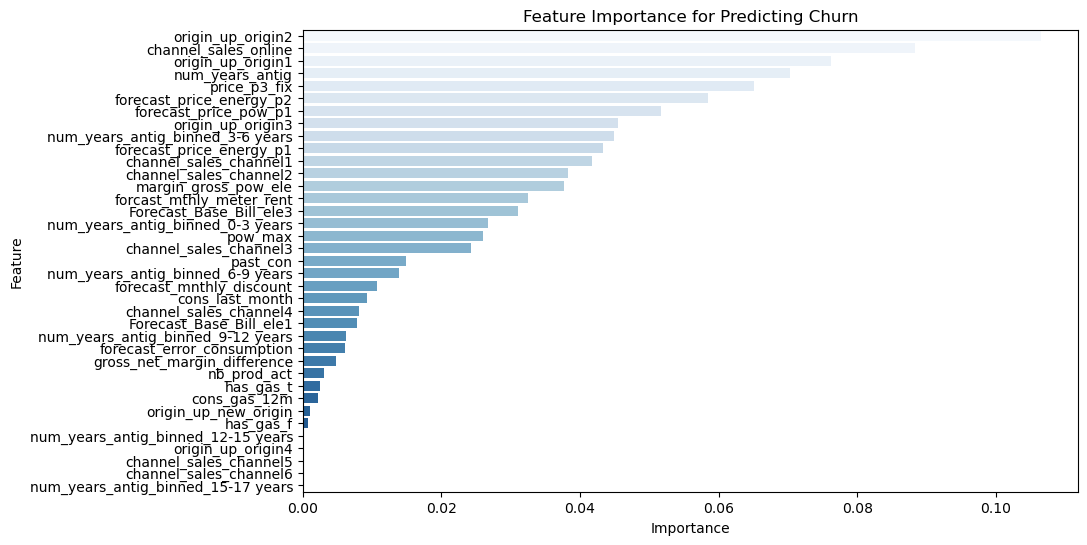

In [200]:
# Plotting the importance feature
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues')
plt.title('Feature Importance for Predicting Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Slicing the DataFrame to include only the top 10 features
top_10_importance_df = importance_df.head(10)

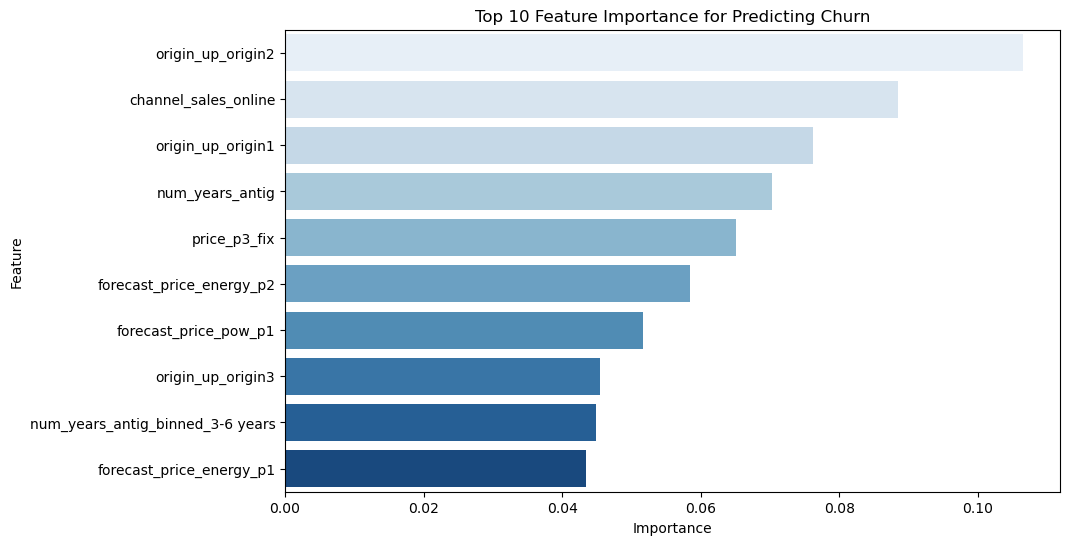

In [201]:
# Plot feature importances for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importance_df, palette='Blues')
plt.title('Top 10 Feature Importance for Predicting Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()